# AI in Mental Health: Detecting Early Signs of Instability

## Project Description

The AI in Mental Health project aims to build a machine-learning-based system that can analyze user data and predict potential mental-health conditions such as depression, anxiety, or stress levels. The project uses a combination of data preprocessing, statistical analysis, and machine learning algorithms to identify hidden patterns in mental-health indicators.

The system processes various factors such as demographic details, lifestyle habits, mental-health symptoms, work-life balance, relationships, and emotional well-being. After cleaning and transforming the dataset using encoding techniques and pipelines, several machine-learning models—such as Decision Trees, Random Forest, Gradient Boosting, Logistic Regression, and Ensemble Voting Classifiers—are trained and evaluated.

By comparing multiple models, the best-performing algorithm is selected and saved using model serialization. The final AI model can predict mental-health risks for new users, making it useful for early awareness, screening, and wellness applications. This project demonstrates how artificial intelligence can support mental-health assessment, provide data-driven insights, and enable proactive support systems.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
import joblib

In [2]:
# Load the dataset
df = pd.read_csv('/content/Mental Health Dataset.csv')

In [3]:
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [4]:
df.tail()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
292359,7/27/2015 23:25,Male,United States,Business,Yes,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure
292360,8/17/2015 9:38,Male,South Africa,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
292361,8/25/2015 19:59,Male,United States,Business,No,Yes,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No
292362,9/26/2015 1:07,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
292363,2/1/2016 23:04,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes


In [5]:
df.columns

Index(['Timestamp', 'Gender', 'Country', 'Occupation', 'self_employed',
       'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress',
       'Changes_Habits', 'Mental_Health_History', 'Mood_Swings',
       'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
       'mental_health_interview', 'care_options'],
      dtype='object')

In [6]:
df.shape

(292364, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [8]:
df.describe()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,292364,292364,292364,292364,287162,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364
unique,580,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,8/27/2014 11:43,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,2384,239850,171308,66351,257994,176832,147606,63548,99985,109523,104018,101064,154328,105843,103393,232166,118886


In [9]:
df.isna().sum()

,0
Timestamp,0
Gender,0
Country,0
Occupation,0
self_employed,5202
family_history,0
treatment,0
Days_Indoors,0
Growing_Stress,0
Changes_Habits,0


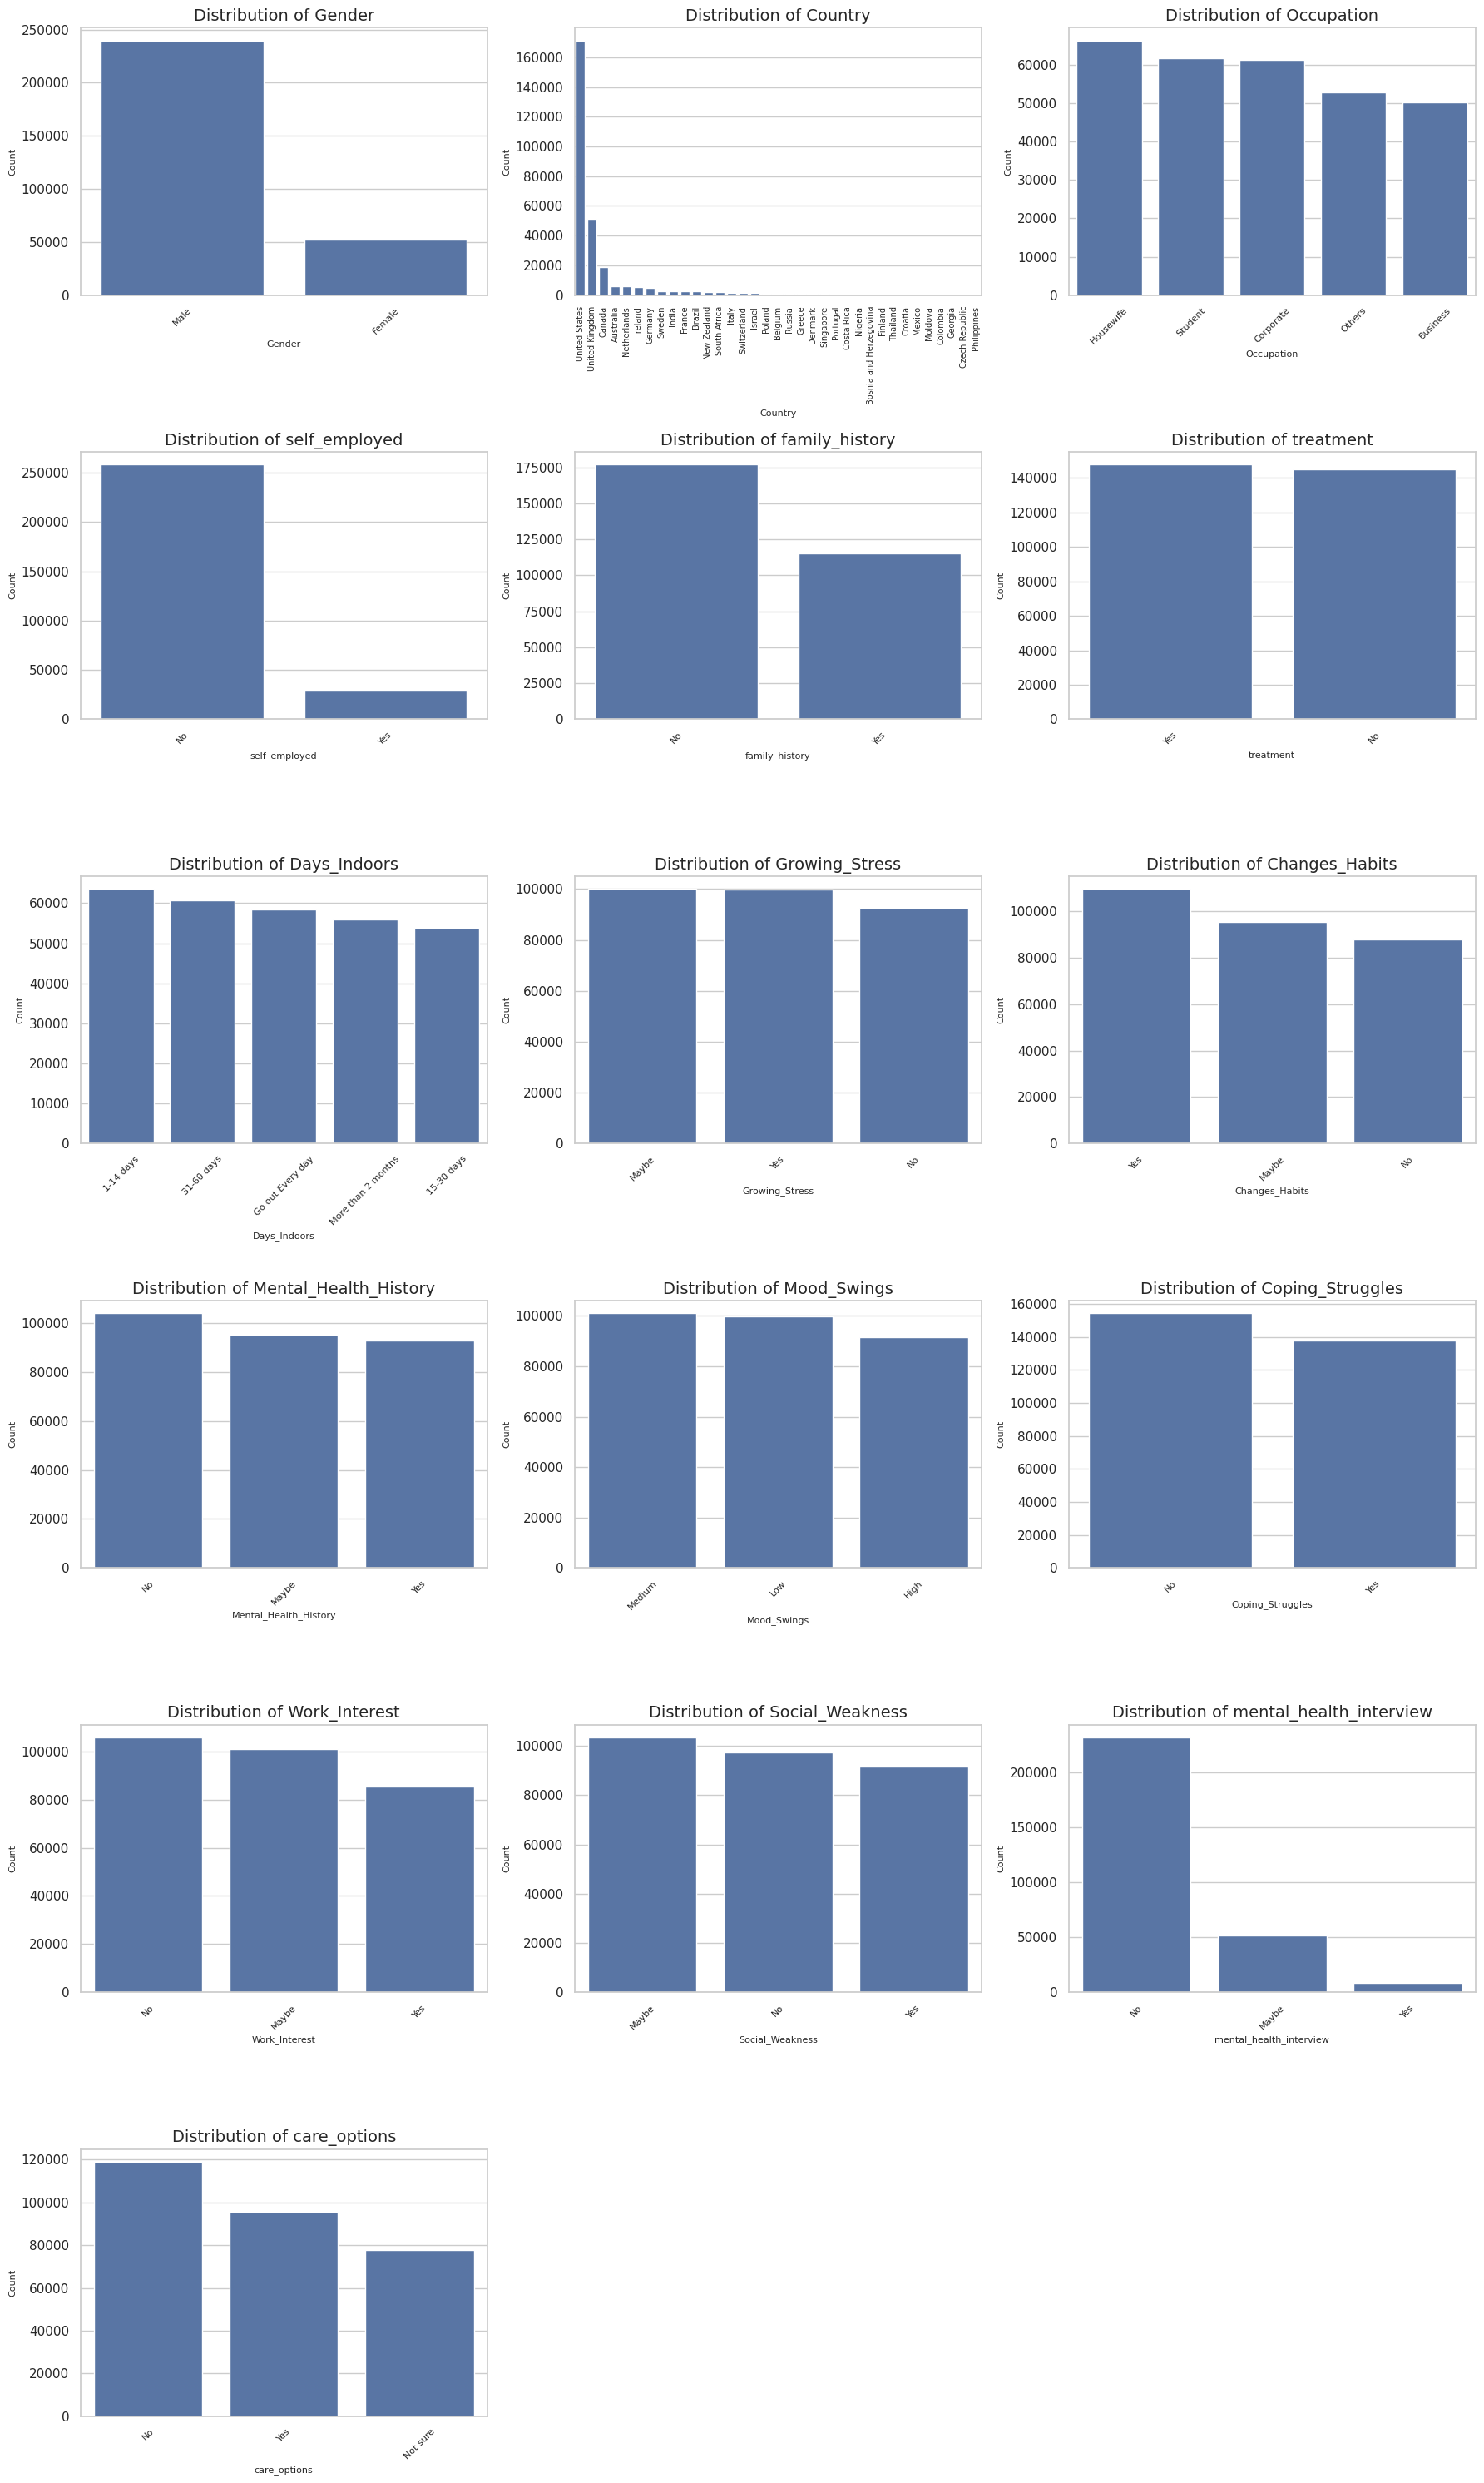

In [10]:
sns.set(style="whitegrid")

# List of columns to visualize
columns_to_plot = df.columns[1:]  # Exclude 'Timestamp'

# Number of rows and columns for subplots
num_columns = 3  # Number of plots per row
num_rows = (len(columns_to_plot) + num_columns - 1) // num_columns  # Calculate rows dynamically

# Create a figure with subplots, adjusted height for better label display
fig, axes = plt.subplots(num_rows, num_columns, figsize=(18, num_rows * 5))
axes = axes.flatten()  # Flatten the 2D array of axes into a 1D array for easier indexing

# Plot each column
for i, col in enumerate(columns_to_plot):
    sns.barplot(
        x=df[col].value_counts().index,
        y=df[col].value_counts().values,
        ax=axes[i]
    )
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=8)
    axes[i].set_ylabel('Count', fontsize=8)

    # Special handling for 'Country' column labels to prevent overlap
    if col == 'Country':
        axes[i].tick_params(axis='x', rotation=90, labelsize=7) # More rotation and smaller font for Country
    else:
        axes[i].tick_params(axis='x', rotation=45, labelsize=8) # Default rotation and font size

# Remove any unused subplots
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [11]:
# Fill missing values
df['self_employed'] = df['self_employed'].fillna(df['self_employed'].mode()[0])
df.isna().sum()

,0
Timestamp,0
Gender,0
Country,0
Occupation,0
self_employed,0
family_history,0
treatment,0
Days_Indoors,0
Growing_Stress,0
Changes_Habits,0


In [12]:
df = df.drop(columns=['Timestamp'])

In [13]:
df.columns

Index(['Gender', 'Country', 'Occupation', 'self_employed', 'family_history',
       'treatment', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits',
       'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles',
       'Work_Interest', 'Social_Weakness', 'mental_health_interview',
       'care_options'],
      dtype='object')

In [14]:
df.shape

(292364, 16)

In [ ]:
# Create a new column for counting "Yes" responses
yes_columns = [
    'self_employed',
    'family_history',
    'Growing_Stress',
    'Changes_Habits',
    'Mental_Health_History',
    'Coping_Struggles',
    'Social_Weakness',
    'mental_health_interview',
    'care_options'
]
df['Yes_Count'] = df[yes_columns].apply(lambda x: (x == 'Yes').sum(), axis=1)

In [15]:
for column in df.columns:
    print(f"Unique categories in '{column}':")
    print(df[column].unique())
    print()

Unique categories in 'Gender':
['Female' 'Male']

Unique categories in 'Country':
['United States' 'Poland' 'Australia' 'Canada' 'United Kingdom'
 'South Africa' 'Sweden' 'New Zealand' 'Netherlands' 'India' 'Belgium'
 'Ireland' 'France' 'Portugal' 'Brazil' 'Costa Rica' 'Russia' 'Germany'
 'Switzerland' 'Finland' 'Israel' 'Italy' 'Bosnia and Herzegovina'
 'Singapore' 'Nigeria' 'Croatia' 'Thailand' 'Denmark' 'Mexico' 'Greece'
 'Moldova' 'Colombia' 'Georgia' 'Czech Republic' 'Philippines']

Unique categories in 'Occupation':
['Corporate' 'Student' 'Business' 'Housewife' 'Others']

Unique categories in 'self_employed':
['No' 'Yes']

Unique categories in 'family_history':
['No' 'Yes']

Unique categories in 'treatment':
['Yes' 'No']

Unique categories in 'Days_Indoors':
['1-14 days' 'Go out Every day' 'More than 2 months' '15-30 days'
 '31-60 days']

Unique categories in 'Growing_Stress':
['Yes' 'No' 'Maybe']

Unique categories in 'Changes_Habits':
['No' 'Yes' 'Maybe']

Unique categories in 

In [16]:
df.shape

(292364, 16)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Gender                   292364 non-null  object
 1   Country                  292364 non-null  object
 2   Occupation               292364 non-null  object
 3   self_employed            292364 non-null  object
 4   family_history           292364 non-null  object
 5   treatment                292364 non-null  object
 6   Days_Indoors             292364 non-null  object
 7   Growing_Stress           292364 non-null  object
 8   Changes_Habits           292364 non-null  object
 9   Mental_Health_History    292364 non-null  object
 10  Mood_Swings              292364 non-null  object
 11  Coping_Struggles         292364 non-null  object
 12  Work_Interest            292364 non-null  object
 13  Social_Weakness          292364 non-null  object
 14  mental_health_interv

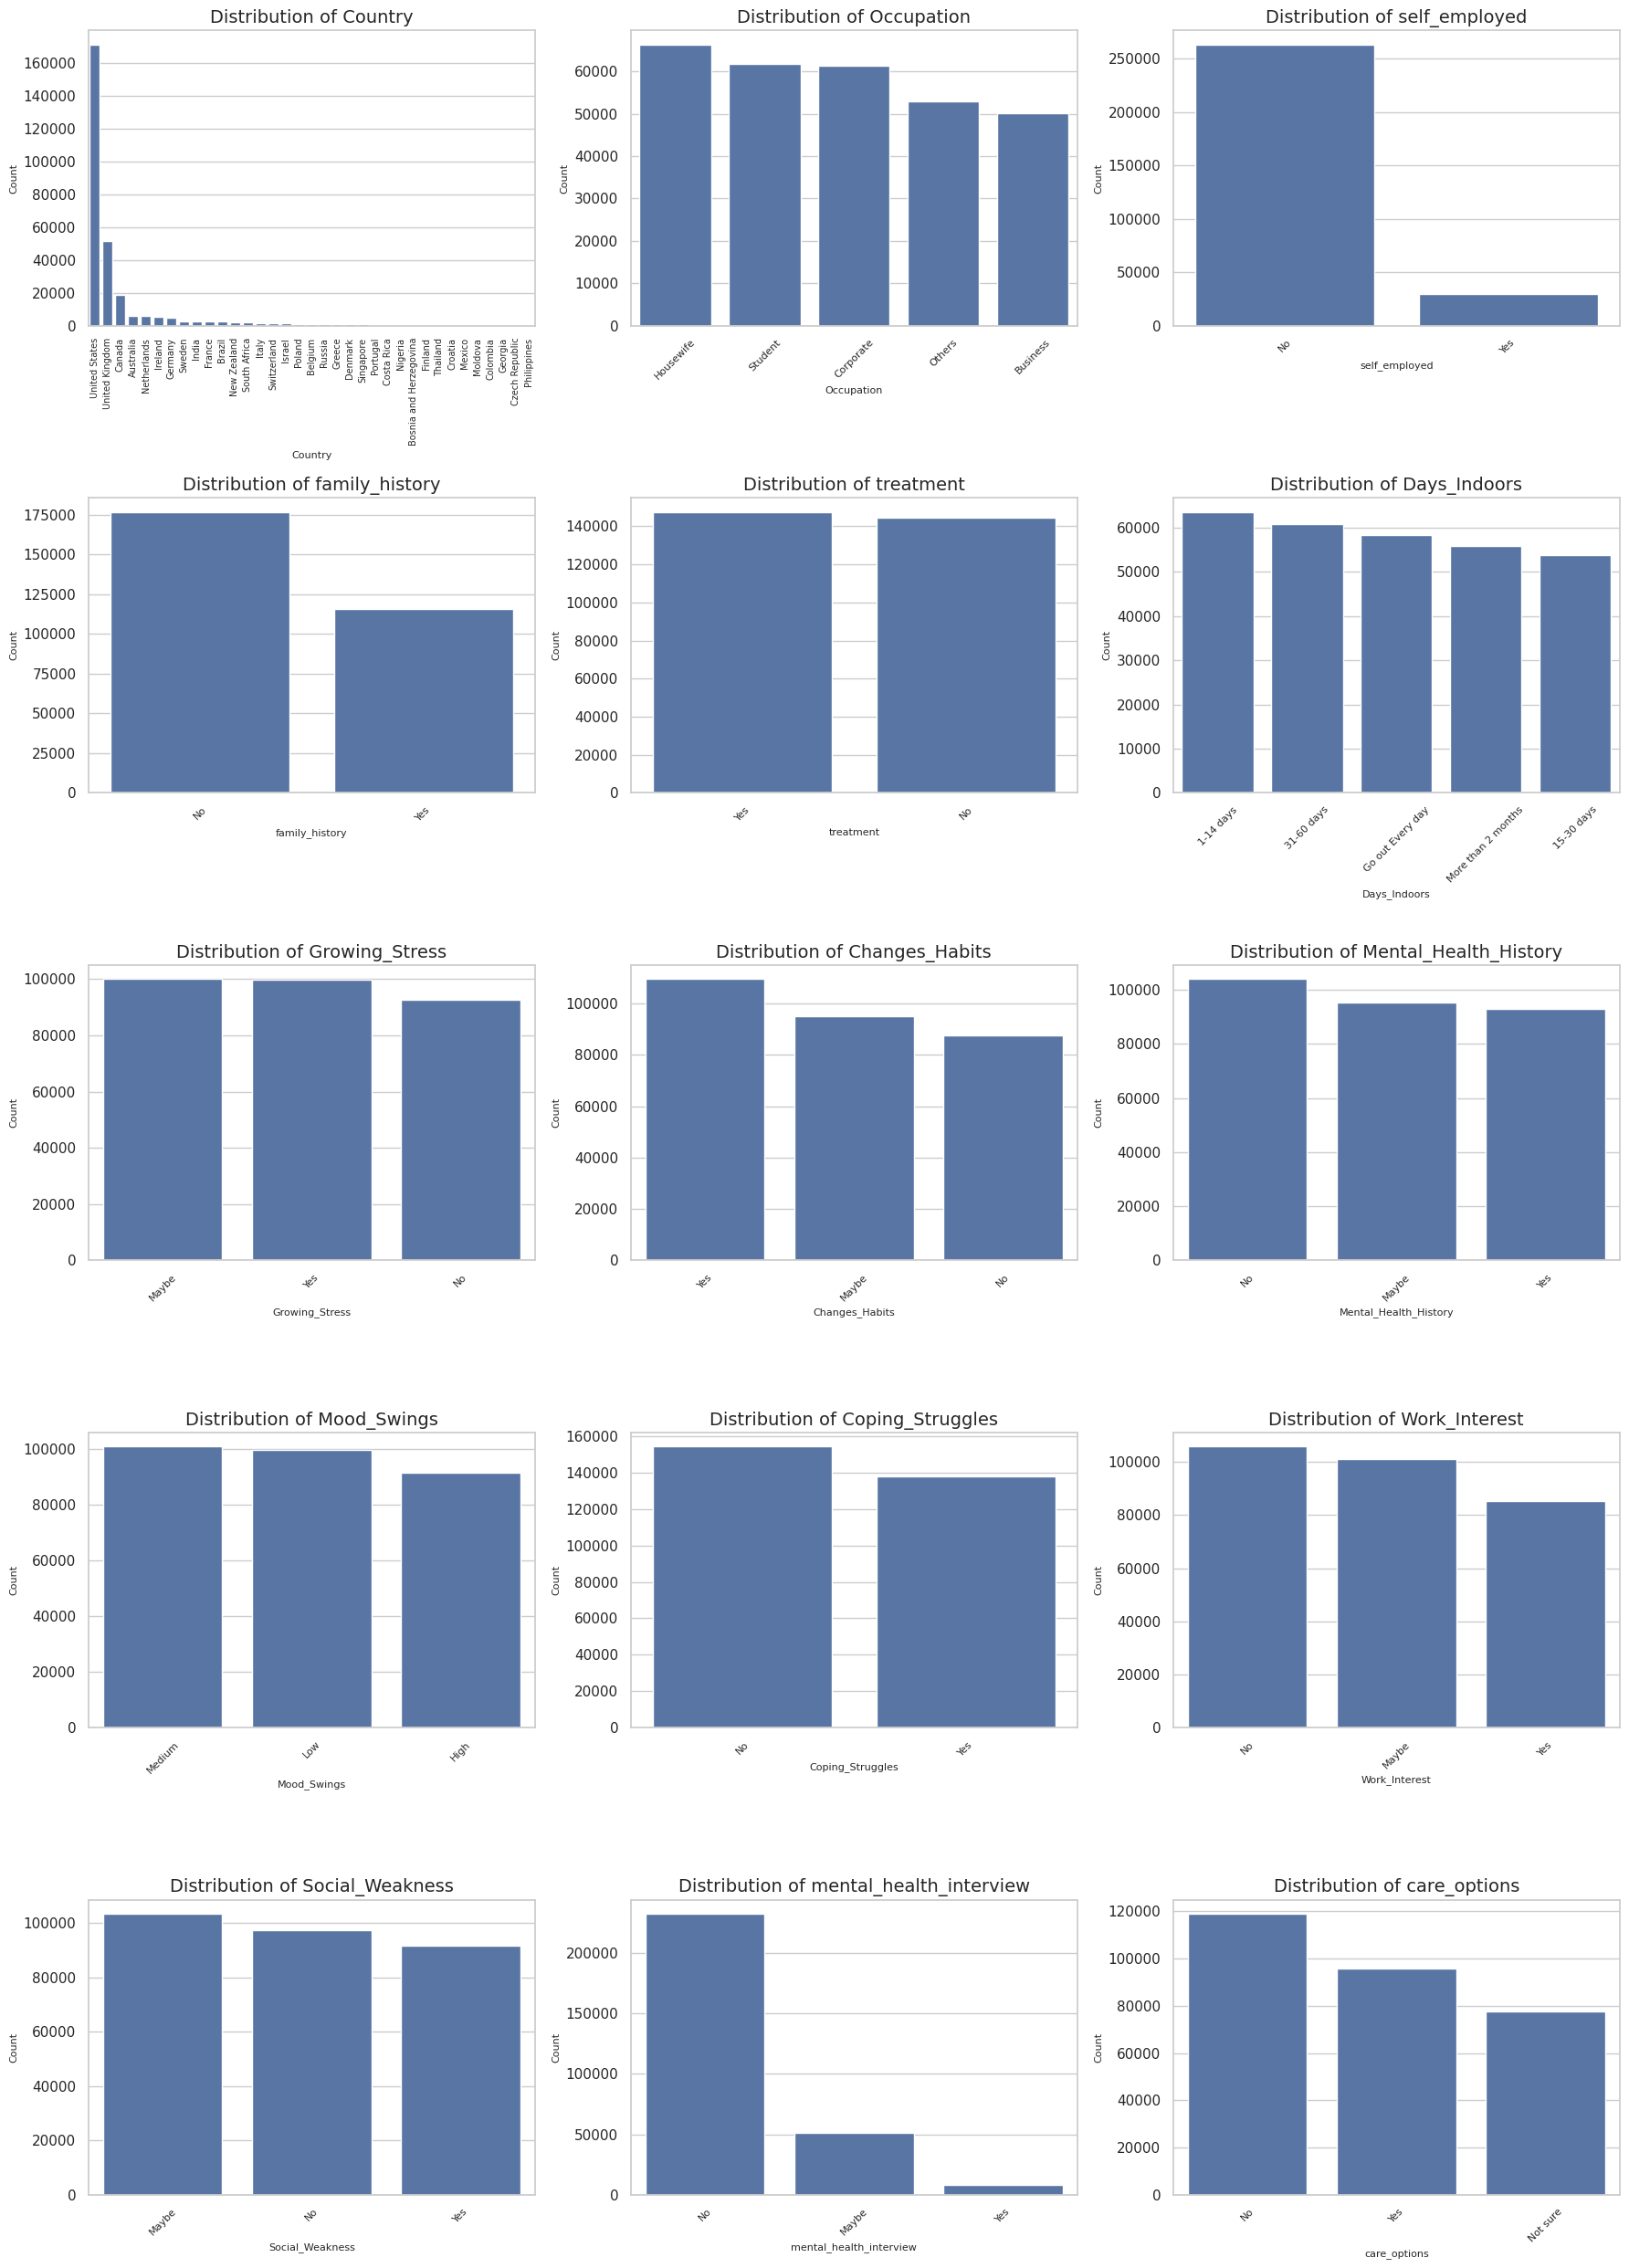

In [22]:
sns.set(style="whitegrid")

# List of columns to visualize
columns_to_plot = df.columns[1:]  # Exclude 'Timestamp'

# Number of rows and columns for subplots
num_columns = 3  # Number of plots per row
num_rows = (len(columns_to_plot) + num_columns - 1) // num_columns  # Calculate rows dynamically

# Create a figure with subplots, adjusted height for better label display
fig, axes = plt.subplots(num_rows, num_columns, figsize=(18, num_rows * 5))
axes = axes.flatten()  # Flatten the 2D array of axes into a 1D array for easier indexing

# Plot each column
for i, col in enumerate(columns_to_plot):
    sns.barplot(
        x=df[col].value_counts().index,
        y=df[col].value_counts().values,
        ax=axes[i]
    )
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=8)
    axes[i].set_ylabel('Count', fontsize=8)

    # Special handling for 'Country' column labels to prevent overlap
    if col == 'Country':
        axes[i].tick_params(axis='x', rotation=90, labelsize=7) # More rotation and smaller font for Country
    else:
        axes[i].tick_params(axis='x', rotation=45, labelsize=8) # Default rotation and font size

# Remove any unused subplots
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [26]:
yes_columns = [
    'self_employed',
    'family_history',
    'Growing_Stress',
    'Changes_Habits',
    'Mental_Health_History',
    'Coping_Struggles',
    'Social_Weakness',
    'mental_health_interview',
    'care_options'
]
df['Yes_Count'] = df[yes_columns].apply(lambda x: (x == 'Yes').sum(), axis=1)

# Define features and target variable
X = df.drop(columns=['Yes_Count'])
y = df['Yes_Count']

In [28]:
categorical_features = X.select_dtypes(include=['object']).columns
numeric_features = X.select_dtypes(exclude=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Keep numeric features as they are
)

In [29]:
categorical_features = X.select_dtypes(include=['object']).columns
numeric_features = X.select_dtypes(exclude=['object']).columns

print("Defined categorical_features:", categorical_features.tolist())

Defined categorical_features: ['Gender', 'Country', 'Occupation', 'self_employed', 'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits', 'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness', 'mental_health_interview', 'care_options']


In [30]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Keep numeric features as they are
)

In [31]:
# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
# Function to calculate and return metrics
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred, output_dict=True)

    # Extract precision, recall, and F1 score for the positive class (usually class 1)
    precision = report['1']['precision']
    recall = report['1']['recall']
    f1_score = report['1']['f1-score']

    return accuracy, precision, recall, f1_score


In [33]:
table = PrettyTable()
table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1 Score"]


In [34]:
# Create a Gradient Boosting model
model_gb = GradientBoostingClassifier()

# Create a pipeline that first transforms the data and then fits the model
pipeline_gb = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model_gb)])

# Fit the model
pipeline_gb.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = pipeline_gb.predict(X_test)

# Calculate metrics for Gradient Boosting
accuracy_gb, precision_gb, recall_gb, f1_score_gb = calculate_metrics(y_test, y_pred_gb)
table.add_row(["Gradient Boosting", f"{accuracy_gb*100:.4f}", f"{precision_gb:.4f}", f"{recall_gb:.4f}", f"{f1_score_gb:.4f}"])

# Print results
print(f"Accuracy: {accuracy_gb*100:.4f}")


Accuracy: 91.7107


In [35]:
# Create a Random Forest Classifier model
model = RandomForestClassifier()
# Create a pipeline that first transforms the data and then fits the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', model)])
# Fit the model
pipeline.fit(X_train, y_train)
# Predict on the test set
y_pred = pipeline.predict(X_test)

# Calculate metrics for Logistic Regression
accuracy, precision, recall, f1_score = calculate_metrics(y_test, y_pred)
table.add_row(["Random Forest", f"{accuracy*100:.4f}", f"{precision:.4f}", f"{recall:.4f}", f"{f1_score:.4f}"])

# Print results
print(f"Accuracy: {accuracy*100:.4f}")

Accuracy: 99.2458


In [ ]:
# Create a Logistic Regression model
model2 = LogisticRegression(max_iter=1000)

# Create a pipeline that first transforms the data and then fits the model
pipeline2 = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', model)])

# Fit the model
pipeline2.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline2.predict(X_test)

# Calculate metrics for Logistic Regression
accuracy_lr, precision_lr, recall_lr, f1_score_lr = calculate_metrics(y_test, y_pred)
table.add_row(["Logistic Regression", f"{accuracy_lr*100:.4f}", f"{precision_lr:.4f}", f"{recall_lr:.4f}", f"{f1_score_lr:.4f}"])

# Print results
print(f"Accuracy: {accuracy_lr*100:.4f}")


In [ ]:
# Create a Decision Tree model
model_dt = DecisionTreeClassifier()

# Create a pipeline that first transforms the data and then fits the model
pipeline_dt = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model_dt)])

# Fit the model
pipeline_dt.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = pipeline_dt.predict(X_test)

# Calculate metrics for Decision Tree
accuracy_dt, precision_dt, recall_dt, f1_score_dt = calculate_metrics(y_test, y_pred_dt)
table.add_row(["Decision Tree", f"{accuracy_dt*100:.4f}", f"{precision_dt:.4f}", f"{recall_dt:.4f}", f"{f1_score_dt:.4f}"])

# Print results
print(f"Accuracy: {accuracy_dt*100:.4f}")

Accuracy: 99.9966


In [ ]:
# Create a LightGBM model
model_lgbm = lgb.LGBMClassifier()

# Create a pipeline that first transforms the data and then fits the model
pipeline_lgbm = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', model_lgbm)])

# Fit the model
pipeline_lgbm.fit(X_train, y_train)

# Predict on the test set
y_pred_lgbm = pipeline_lgbm.predict(X_test)

# Calculate metrics for LightGBM
accuracy_lgbm, precision_lgbm, recall_lgbm, f1_score_lgbm = calculate_metrics(y_test, y_pred_lgbm)
table.add_row(["LightGBM", f"{accuracy_lgbm*100:.4f}", f"{precision_lgbm:.4f}", f"{recall_lgbm:.4f}", f"{f1_score_lgbm:.4f}"])

# Print results
print(f"Accuracy: {accuracy_lgbm*100:.4f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.048160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 158
[LightGBM] [Info] Number of data points in the train set: 233891, number of used features: 79
[LightGBM] [Info] Start training from score -3.313261
[LightGBM] [Info] Start training from score -1.829981
[LightGBM] [Info] Start training from score -1.284816
[LightGBM] [Info] Start training from score -1.318873
[LightGBM] [Info] Start training from score -1.792653
[LightGBM] [Info] Start training from score -2.659405
[LightGBM] [Info] Start training from score -3.955009
[LightGBM] [Info] Start training from score -5.761380
[LightGBM] [Info] Start training from score -8.355277
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Accuracy: 96.2684


In [ ]:
# Create an XGBoost model
model_xgb = xgb.XGBClassifier(eval_metric='logloss')

# Create a pipeline that first transforms the data and then fits the model
pipeline_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', model_xgb)])

# Fit the model
pipeline_xgb.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = pipeline_xgb.predict(X_test)

# Calculate metrics for XGBoost
accuracy_xgb, precision_xgb, recall_xgb, f1_score_xgb = calculate_metrics(y_test, y_pred_xgb)
table.add_row(["XGBoost", f"{accuracy_xgb*100:.4f}", f"{precision_xgb:.4f}", f"{recall_xgb:.4f}", f"{f1_score_xgb:.4f}"])

# Print results
print(f"Accuracy: {accuracy_xgb*100:.4f}")

Accuracy: 99.9384


In [ ]:
# Voting Classifier 1: Gradient Boosting, Random Forest, Logistic Regression
model_vc1 = VotingClassifier(estimators=[('gb', GradientBoostingClassifier()), ('rf', RandomForestClassifier()), ('lr', LogisticRegression(max_iter=1000))], voting='soft')
pipeline_vc1 = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model_vc1)])
pipeline_vc1.fit(X_train, y_train)
y_pred_vc1 = pipeline_vc1.predict(X_test)
accuracy_vc1, precision_vc1, recall_vc1, f1_score_vc1 = calculate_metrics(y_test, y_pred_vc1)
table.add_row(["GB + RF + LR", f"{accuracy_vc1*100:.4f}", f"{precision_vc1:.4f}", f"{recall_vc1:.4f}", f"{f1_score_vc1:.4f}"])
print(f"GB + RF + LR Accuracy: {accuracy_vc1*100:.4f}")


GB + RF + LR Accuracy: 99.9333


In [ ]:
# Voting Classifier 2: Gradient Boosting, Decision Tree
model_vc2 = VotingClassifier(estimators=[('gb', GradientBoostingClassifier()), ('dt', DecisionTreeClassifier())], voting='soft')
pipeline_vc2 = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model_vc2)])
pipeline_vc2.fit(X_train, y_train)
y_pred_vc2 = pipeline_vc2.predict(X_test)
accuracy_vc2, precision_vc2, recall_vc2, f1_score_vc2 = calculate_metrics(y_test, y_pred_vc2)
table.add_row(["GB + DT", f"{accuracy_vc2*100:.4f}", f"{precision_vc2:.4f}", f"{recall_vc2:.4f}", f"{f1_score_vc2:.4f}"])
print(f"GB + DT Accuracy: {accuracy_vc2*100:.4f}")


GB + DT Accuracy: 100.0000


In [ ]:
# Voting Classifier 3: Random Forest, LightGBM
model_vc3 = VotingClassifier(estimators=[('rf', RandomForestClassifier()), ('lgb', lgb.LGBMClassifier())], voting='soft')
pipeline_vc3 = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model_vc3)])
pipeline_vc3.fit(X_train, y_train)
y_pred_vc3 = pipeline_vc3.predict(X_test)
accuracy_vc3, precision_vc3, recall_vc3, f1_score_vc3 = calculate_metrics(y_test, y_pred_vc3)
table.add_row(["RF + LGB", f"{accuracy_vc3*100:.4f}", f"{precision_vc3:.4f}", f"{recall_vc3:.4f}", f"{f1_score_vc3:.4f}"])
print(f"RF + LGB Accuracy: {accuracy_vc3*100:.4f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 158
[LightGBM] [Info] Number of data points in the train set: 157088, number of used features: 79
[LightGBM] [Info] Start training from score -3.417615
[LightGBM] [Info] Start training from score -1.940849
[LightGBM] [Info] Start training from score -1.297888
[LightGBM] [Info] Start training from score -1.289925
[LightGBM] [Info] Start training from score -1.737506
[LightGBM] [Info] Start training from score -2.590573
[LightGBM] [Info] Start training from score -3.884634
[LightGBM] [Info] Start training from score -5.669295
[LightGBM] [Info] Start training from score -8.157899
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


RF + LGB Accuracy: 98.0725


In [ ]:
# Voting Classifier 4: Decision Tree, XGBoost
model_vc4 = VotingClassifier(estimators=[('dt', DecisionTreeClassifier()), ('xgb', xgb.XGBClassifier(eval_metric='logloss'))], voting='soft')
pipeline_vc4 = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model_vc4)])
pipeline_vc4.fit(X_train, y_train)
y_pred_vc4 = pipeline_vc4.predict(X_test)
accuracy_vc4, precision_vc4, recall_vc4, f1_score_vc4 = calculate_metrics(y_test, y_pred_vc4)
table.add_row(["DT + XGB", f"{accuracy_vc4*100:.4f}", f"{precision_vc4:.4f}", f"{recall_vc4:.4f}", f"{f1_score_vc4:.4f}"])
print(f"DT + XGB Accuracy: {accuracy_vc4*100:.4f}")


DT + XGB Accuracy: 99.9796


In [ ]:
# Voting Classifier 5: Decision Tree, Logistic Regression, LightGBM
model_vc5 = VotingClassifier(estimators=[('dt', DecisionTreeClassifier()), ('lr', LogisticRegression(max_iter=1000)), ('lgb', lgb.LGBMClassifier())], voting='soft')
pipeline_vc5 = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model_vc5)])
pipeline_vc5.fit(X_train, y_train)
y_pred_vc5 = pipeline_vc5.predict(X_test)
accuracy_vc5, precision_vc5, recall_vc5, f1_score_vc5 = calculate_metrics(y_test, y_pred_vc5)
table.add_row(["DT + LR + LGB", f"{accuracy_vc5*100:.4f}", f"{precision_vc5:.4f}", f"{recall_vc5:.4f}", f"{f1_score_vc5:.4f}"])
print(f"DT + LR + LGB Accuracy: {accuracy_vc5*100:.4f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025812 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 158
[LightGBM] [Info] Number of data points in the train set: 157088, number of used features: 79
[LightGBM] [Info] Start training from score -3.417615
[LightGBM] [Info] Start training from score -1.940849
[LightGBM] [Info] Start training from score -1.297888
[LightGBM] [Info] Start training from score -1.289925
[LightGBM] [Info] Start training from score -1.737506
[LightGBM] [Info] Start training from score -2.590573
[LightGBM] [Info] Start training from score -3.884634
[LightGBM] [Info] Start training from score -5.669295
[LightGBM] [Info] Start training from score -8.157899
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


DT + LR + LGB Accuracy: 99.9567


In [ ]:
print(table)

+---------------------+----------+-----------+--------+----------+
|        Model        | Accuracy | Precision | Recall | F1 Score |
+---------------------+----------+-----------+--------+----------+
|  Gradient Boosting  | 92.1855  |   0.9716  | 0.9702 |  0.9709  |
|    Random Forest    | 98.8287  |   0.9949  | 1.0000 |  0.9975  |
| Logistic Regression | 98.7396  |   0.9935  | 0.9996 |  0.9966  |
|    Decision Tree    | 99.9796  |   1.0000  | 1.0000 |  1.0000  |
|       LightGBM      | 96.9572  |   0.9815  | 0.9884 |  0.9849  |
|       XGBoost       | 99.8880  |   1.0000  | 1.0000 |  1.0000  |
|     GB + RF + LR    | 99.8549  |   1.0000  | 1.0000 |  1.0000  |
|       GB + DT       | 99.9822  |   1.0000  | 1.0000 |  1.0000  |
|       RF + LGB      | 98.0725  |   0.9866  | 0.9961 |  0.9913  |
|       DT + XGB      | 99.9796  |   1.0000  | 1.0000 |  1.0000  |
|    DT + LR + LGB    | 99.9567  |   1.0000  | 1.0000 |  1.0000  |
+---------------------+----------+-----------+--------+-------

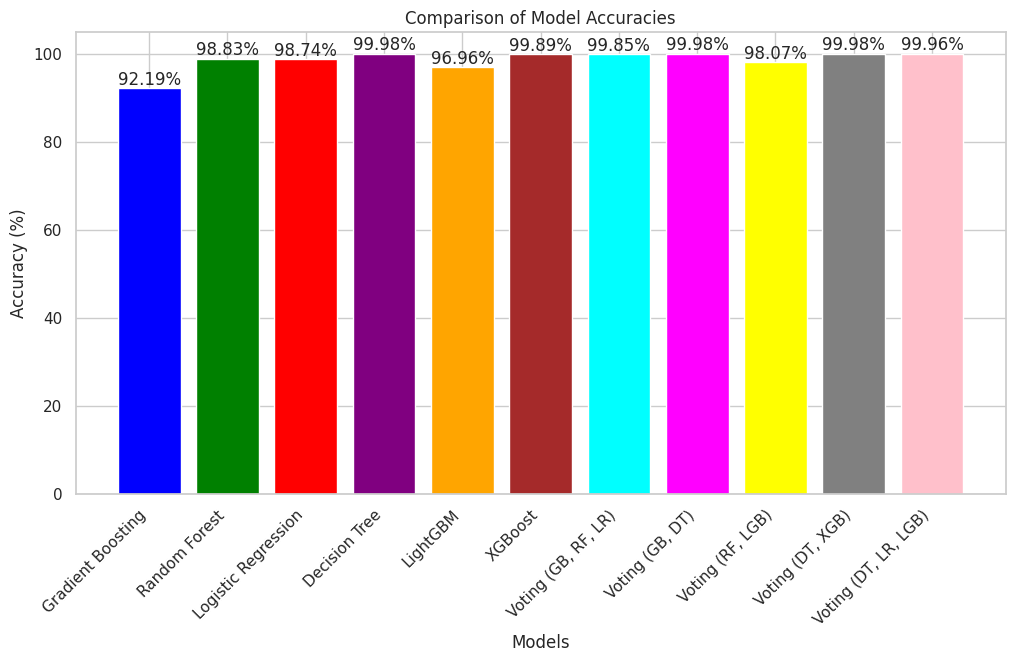

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their corresponding accuracy values
models = ["Gradient Boosting", "Random Forest", "Logistic Regression", "Decision Tree", "LightGBM", "XGBoost",
          "Voting (GB, RF, LR)", "Voting (GB, DT)", "Voting (RF, LGB)", "Voting (DT, XGB)", "Voting (DT, LR, LGB)"]
accuracies = [accuracy_gb, accuracy, accuracy_lr, accuracy_dt, accuracy_lgbm, accuracy_xgb,
              accuracy_vc1, accuracy_vc2, accuracy_vc3, accuracy_vc4, accuracy_vc5]

# Convert accuracies to percentage
accuracies = [acc * 100 for acc in accuracies]

# Set figure size
plt.figure(figsize=(12, 6))

# Create a bar chart
bars = plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'brown', 'cyan', 'magenta', 'yellow', 'gray', 'pink'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}%", ha='center', va='bottom')

# Set labels and title
plt.ylabel("Accuracy (%)")
plt.xlabel("Models")
plt.title("Comparison of Model Accuracies")

# Show the plot
plt.show()


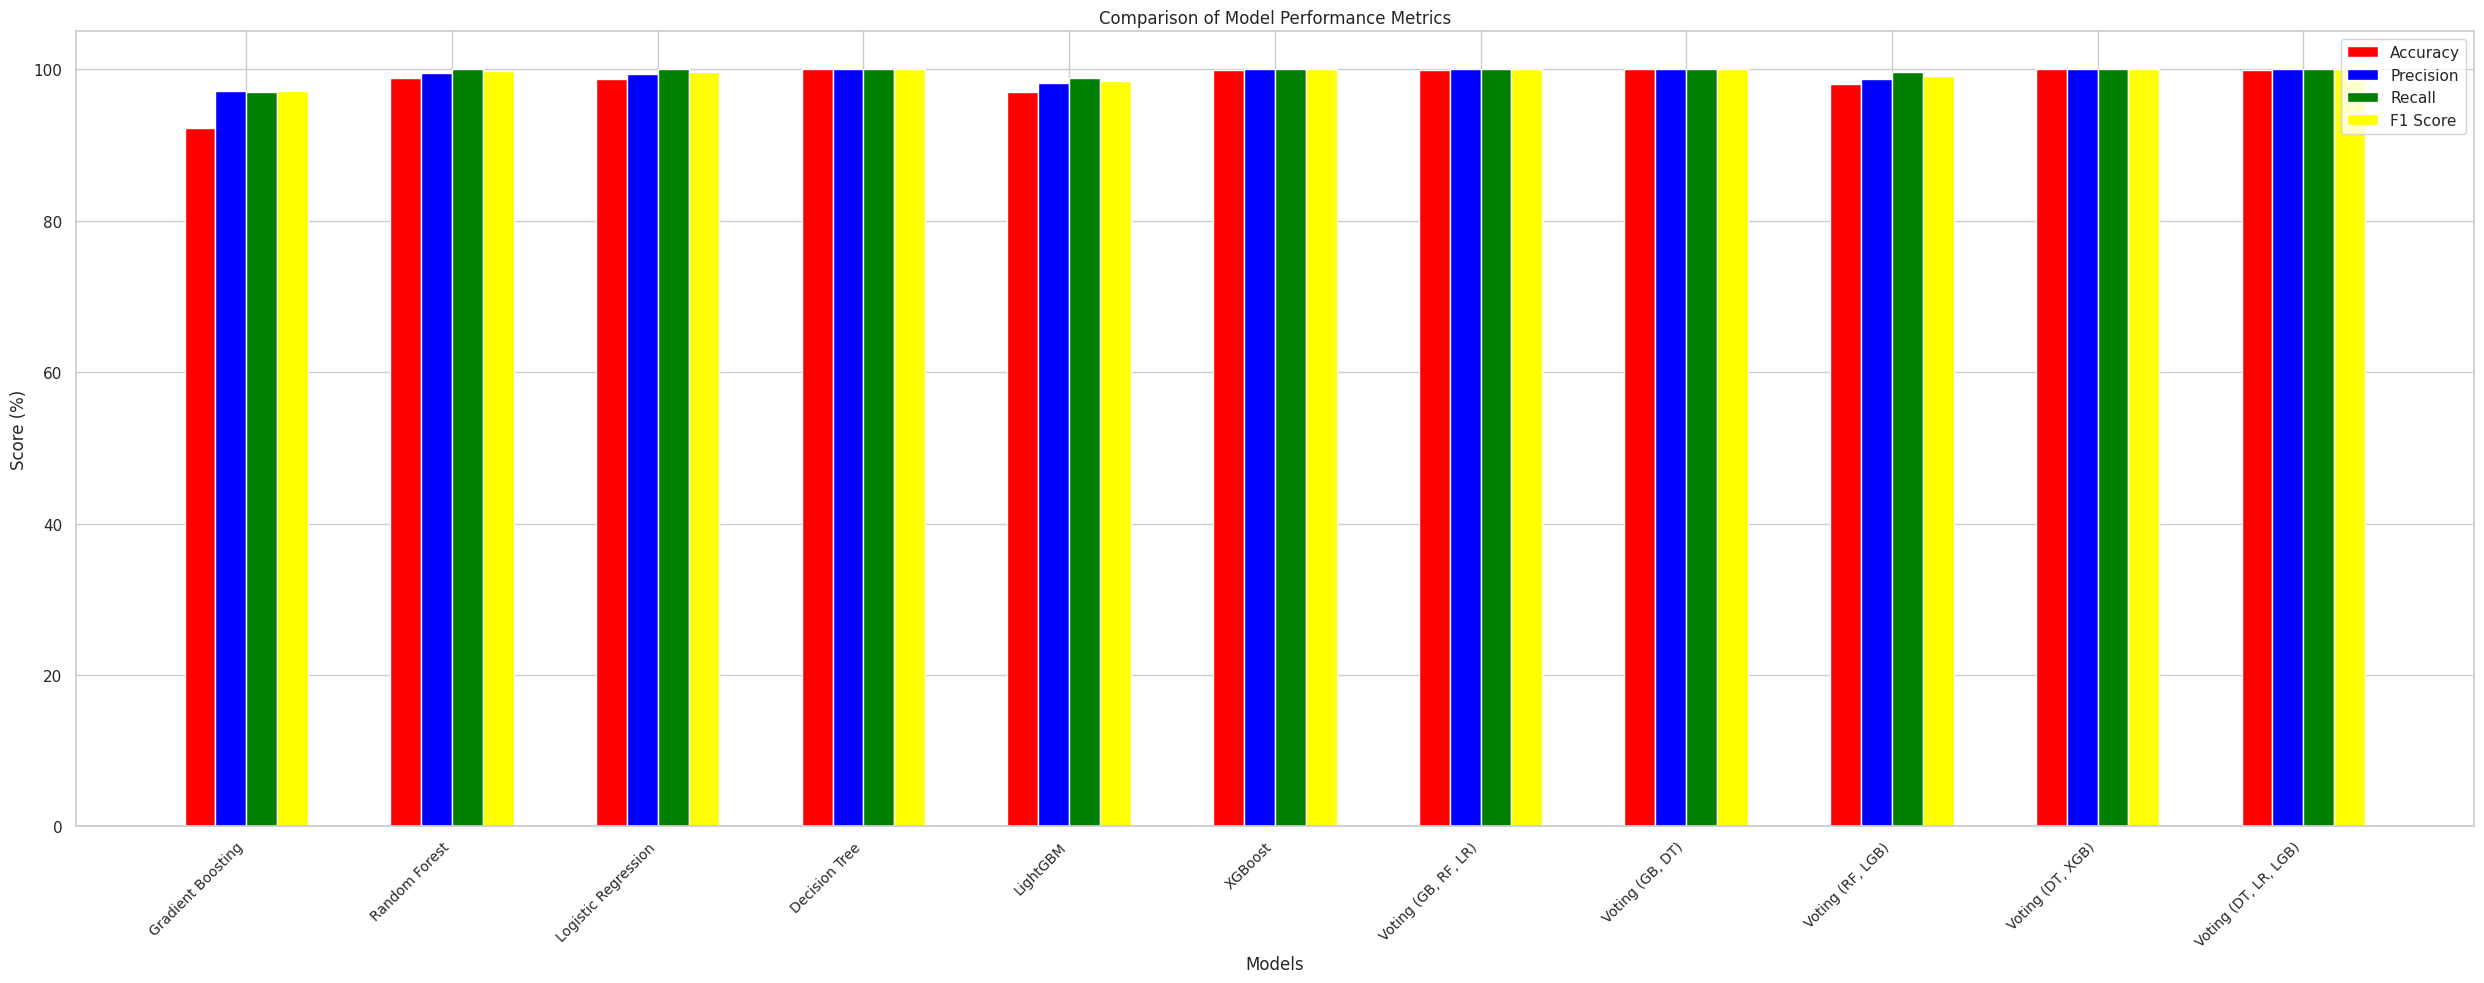

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ["Gradient Boosting", "Random Forest", "Logistic Regression", "Decision Tree", "LightGBM", "XGBoost",
          "Voting (GB, RF, LR)", "Voting (GB, DT)", "Voting (RF, LGB)", "Voting (DT, XGB)", "Voting (DT, LR, LGB)"]

# Metrics values for each model
accuracy_values = [accuracy_gb, accuracy, accuracy_lr, accuracy_dt, accuracy_lgbm, accuracy_xgb,
                   accuracy_vc1, accuracy_vc2, accuracy_vc3, accuracy_vc4, accuracy_vc5]

precision_values = [precision_gb, precision, precision_lr, precision_dt, precision_lgbm, precision_xgb,
                    precision_vc1, precision_vc2, precision_vc3, precision_vc4, precision_vc5]

recall_values = [recall_gb, recall, recall_lr, recall_dt, recall_lgbm, recall_xgb,
                 recall_vc1, recall_vc2, recall_vc3, recall_vc4, recall_vc5]

f1_values = [f1_score_gb, f1_score, f1_score_lr, f1_score_dt, f1_score_lgbm, f1_score_xgb,
             f1_score_vc1, f1_score_vc2, f1_score_vc3, f1_score_vc4, f1_score_vc5]

# Convert values to percentages where applicable
accuracy_values = [val * 100 for val in accuracy_values]
precision_values = [val * 100 for val in precision_values]
recall_values = [val * 100 for val in recall_values]
f1_values = [val * 100 for val in f1_values]

# Set figure size
plt.figure(figsize=(25, 10)) # Increased figsize

# Bar width and positions
bar_width = 0.15 # Increased bar_width
index = np.arange(len(models))

# Plot bars
plt.bar(index, accuracy_values, bar_width, label='Accuracy', color='red')
plt.bar(index + bar_width, precision_values, bar_width, label='Precision', color='blue')
plt.bar(index + 2 * bar_width, recall_values, bar_width, label='Recall', color='green')
plt.bar(index + 3 * bar_width, f1_values, bar_width, label='F1 Score', color='yellow')

# Rotate x-axis labels for better readability
plt.xticks(index + bar_width * 1.5, models, rotation=45, ha='right', fontsize=10) # Adjusted x-ticks and added fontsize

# Set labels and title
plt.ylabel("Score (%)")
plt.xlabel("Models")
plt.title("Comparison of Model Performance Metrics")

# Add legend
plt.legend()

plt.tight_layout() # Added tight_layout
# Show plot
plt.show()

In [ ]:
# Save the Random Forest model
joblib.dump(pipeline_vc2, 'voting_gb_dt_model.pkl')

['voting_gb_dt_model.pkl']

# Task
It looks like the `calculate_metrics` function is currently set up for binary classification, as it only extracts precision, recall, and F1-score for 'class 1'. However, the target variable `Yes_Count` has multiple classes (0-7). To correctly evaluate the multi-class models, I need to modify this function to use weighted averages for precision, recall, and F1-score from the classification report.

Additionally, to provide a more in-depth error analysis, I will:
1.  Generate and visualize the confusion matrix for the proposed 'DT + XGB' ensemble model (`pipeline_vc4`).
2.  Generate a detailed classification report for the 'DT + XGB' ensemble model.
3.  Generate and visualize the confusion matrix for the existing 'Gradient Boosting' model (`pipeline_gb`).
4.  Generate a detailed classification report for the 'Gradient Boosting' model.

This will allow for a comprehensive comparison of the models' performance across all classes.

Starting with the `calculate_metrics` function update:

## Update calculate_metrics Function

### Subtask:
Modify the `calculate_metrics` function to correctly handle multi-class classification by using weighted averages for precision, recall, and F1-score from the classification report. This ensures accurate metrics for the `Yes_Count` target variable.


**Reasoning**:
The subtask requires modifying the `calculate_metrics` function to correctly handle multi-class classification by using weighted averages for precision, recall, and F1-score. I will update the existing function to extract these weighted average values from the classification report.



In [ ]:
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred, output_dict=True)

    # Extract precision, recall, and F1 score for weighted average
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']

    return accuracy, precision, recall, f1_score

In [ ]:
table = PrettyTable()
table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1 Score"]

# Create a Gradient Boosting model
model_gb = GradientBoostingClassifier()

# Create a pipeline that first transforms the data and then fits the model
pipeline_gb = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model_gb)])

# Fit the model
pipeline_gb.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = pipeline_gb.predict(X_test)

# Calculate metrics for Gradient Boosting
accuracy_gb, precision_gb, recall_gb, f1_score_gb = calculate_metrics(y_test, y_pred_gb)
table.add_row(["Gradient Boosting", f"{accuracy_gb*100:.4f}", f"{precision_gb:.4f}", f"{recall_gb:.4f}", f"{f1_score_gb:.4f}"])

# Print results
print(f"Accuracy: {accuracy_gb*100:.4f}")

Accuracy: 92.1855


In [ ]:
model = RandomForestClassifier()
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', model)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

accuracy, precision, recall, f1_score = calculate_metrics(y_test, y_pred)
table.add_row(["Random Forest", f"{accuracy*100:.4f}", f"{precision:.4f}", f"{recall:.4f}", f"{f1_score:.4f}"])

print(f"Accuracy: {accuracy*100:.4f}")

Accuracy: 98.8593


In [ ]:
model2 = LogisticRegression(max_iter=1000)
pipeline2 = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', model2)])
pipeline2.fit(X_train, y_train)
y_pred = pipeline2.predict(X_test)

accuracy_lr, precision_lr, recall_lr, f1_score_lr = calculate_metrics(y_test, y_pred)
table.add_row(["Logistic Regression", f"{accuracy_lr*100:.4f}", f"{precision_lr:.4f}", f"{recall_lr:.4f}", f"{f1_score_lr:.4f}"])

print(f"Accuracy: {accuracy_lr*100:.4f}")

Accuracy: 99.9363


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
model_dt = DecisionTreeClassifier()
pipeline_dt = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model_dt)])
pipeline_dt.fit(X_train, y_train)
y_pred_dt = pipeline_dt.predict(X_test)

accuracy_dt, precision_dt, recall_dt, f1_score_dt = calculate_metrics(y_test, y_pred_dt)
table.add_row(["Decision Tree", f"{accuracy_dt*100:.4f}", f"{precision_dt:.4f}", f"{recall_dt:.4f}", f"{f1_score_dt:.4f}"])

print(f"Accuracy: {accuracy_dt*100:.4f}")

Accuracy: 99.9796


In [ ]:
model_lgbm = lgb.LGBMClassifier()
pipeline_lgbm = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', model_lgbm)])
pipeline_lgbm.fit(X_train, y_train)
y_pred_lgbm = pipeline_lgbm.predict(X_test)

accuracy_lgbm, precision_lgbm, recall_lgbm, f1_score_lgbm = calculate_metrics(y_test, y_pred_lgbm)
table.add_row(["LightGBM", f"{accuracy_lgbm*100:.4f}", f"{precision_lgbm:.4f}", f"{recall_lgbm:.4f}", f"{f1_score_lgbm:.4f}"])

print(f"Accuracy: {accuracy_lgbm*100:.4f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016507 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 158
[LightGBM] [Info] Number of data points in the train set: 157088, number of used features: 79
[LightGBM] [Info] Start training from score -3.417615
[LightGBM] [Info] Start training from score -1.940849
[LightGBM] [Info] Start training from score -1.297888
[LightGBM] [Info] Start training from score -1.289925
[LightGBM] [Info] Start training from score -1.737506
[LightGBM] [Info] Start training from score -2.590573
[LightGBM] [Info] Start training from score -3.884634
[LightGBM] [Info] Start training from score -5.669295
[LightGBM] [Info] Start training from score -8.157899
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Accuracy: 96.9572


In [ ]:
model_xgb = xgb.XGBClassifier(eval_metric='logloss')
pipeline_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', model_xgb)])
pipeline_xgb.fit(X_train, y_train)
y_pred_xgb = pipeline_xgb.predict(X_test)

accuracy_xgb, precision_xgb, recall_xgb, f1_score_xgb = calculate_metrics(y_test, y_pred_xgb)
table.add_row(["XGBoost", f"{accuracy_xgb*100:.4f}", f"{precision_xgb:.4f}", f"{recall_xgb:.4f}", f"{f1_score_xgb:.4f}"])

print(f"Accuracy: {accuracy_xgb*100:.4f}")

Accuracy: 99.8880


In [ ]:
model_vc1 = VotingClassifier(estimators=[('gb', GradientBoostingClassifier()), ('rf', RandomForestClassifier()), ('lr', LogisticRegression(max_iter=1000))], voting='soft')
pipeline_vc1 = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model_vc1)])
pipeline_vc1.fit(X_train, y_train)
y_pred_vc1 = pipeline_vc1.predict(X_test)
accuracy_vc1, precision_vc1, recall_vc1, f1_score_vc1 = calculate_metrics(y_test, y_pred_vc1)
table.add_row(["GB + RF + LR", f"{accuracy_vc1*100:.4f}", f"{precision_vc1:.4f}", f"{recall_vc1:.4f}", f"{f1_score_vc1:.4f}"])
print(f"GB + RF + LR Accuracy: {accuracy_vc1*100:.4f}")

GB + RF + LR Accuracy: 99.8498


In [ ]:
model_vc2 = VotingClassifier(estimators=[('gb', GradientBoostingClassifier()), ('dt', DecisionTreeClassifier())], voting='soft')
pipeline_vc2 = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model_vc2)])
pipeline_vc2.fit(X_train, y_train)
y_pred_vc2 = pipeline_vc2.predict(X_test)
accuracy_vc2, precision_vc2, recall_vc2, f1_score_vc2 = calculate_metrics(y_test, y_pred_vc2)
table.add_row(["GB + DT", f"{accuracy_vc2*100:.4f}", f"{precision_vc2:.4f}", f"{recall_vc2:.4f}", f"{f1_score_vc2:.4f}"])
print(f"GB + DT Accuracy: {accuracy_vc2*100:.4f}")

GB + DT Accuracy: 99.9796


In [ ]:
model_vc3 = VotingClassifier(estimators=[('rf', RandomForestClassifier()), ('lgb', lgb.LGBMClassifier())], voting='soft')
pipeline_vc3 = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model_vc3)])
pipeline_vc3.fit(X_train, y_train)
y_pred_vc3 = pipeline_vc3.predict(X_test)
accuracy_vc3, precision_vc3, recall_vc3, f1_score_vc3 = calculate_metrics(y_test, y_pred_vc3)
table.add_row(["RF + LGB", f"{accuracy_vc3*100:.4f}", f"{precision_vc3:.4f}", f"{recall_vc3:.4f}", f"{f1_score_vc3:.4f}"])
print(f"RF + LGB Accuracy: {accuracy_vc3*100:.4f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 158
[LightGBM] [Info] Number of data points in the train set: 157088, number of used features: 79
[LightGBM] [Info] Start training from score -3.417615
[LightGBM] [Info] Start training from score -1.940849
[LightGBM] [Info] Start training from score -1.297888
[LightGBM] [Info] Start training from score -1.289925
[LightGBM] [Info] Start training from score -1.737506
[LightGBM] [Info] Start training from score -2.590573
[LightGBM] [Info] Start training from score -3.884634
[LightGBM] [Info] Start training from score -5.669295
[LightGBM] [Info] Start training from score -8.157899
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


RF + LGB Accuracy: 98.0750


In [ ]:
model_vc4 = VotingClassifier(estimators=[('dt', DecisionTreeClassifier()), ('xgb', xgb.XGBClassifier(eval_metric='logloss'))], voting='soft')
pipeline_vc4 = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model_vc4)])
pipeline_vc4.fit(X_train, y_train)
y_pred_vc4 = pipeline_vc4.predict(X_test)
accuracy_vc4, precision_vc4, recall_vc4, f1_score_vc4 = calculate_metrics(y_test, y_pred_vc4)
table.add_row(["DT + XGB", f"{accuracy_vc4*100:.4f}", f"{precision_vc4:.4f}", f"{recall_vc4:.4f}", f"{f1_score_vc4:.4f}"])
print(f"DT + XGB Accuracy: {accuracy_vc4*100:.4f}")

DT + XGB Accuracy: 99.9771


In [ ]:
model_vc5 = VotingClassifier(estimators=[('dt', DecisionTreeClassifier()), ('lr', LogisticRegression(max_iter=1000)), ('lgb', lgb.LGBMClassifier())], voting='soft')
pipeline_vc5 = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model_vc5)])
pipeline_vc5.fit(X_train, y_train)
y_pred_vc5 = pipeline_vc5.predict(X_test)
accuracy_vc5, precision_vc5, recall_vc5, f1_score_vc5 = calculate_metrics(y_test, y_pred_vc5)
table.add_row(["DT + LR + LGB", f"{accuracy_vc5*100:.4f}", f"{precision_vc5:.4f}", f"{recall_vc5:.4f}", f"{f1_score_vc5:.4f}"])
print(f"DT + LR + LGB Accuracy: {accuracy_vc5*100:.4f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017736 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 158
[LightGBM] [Info] Number of data points in the train set: 157088, number of used features: 79
[LightGBM] [Info] Start training from score -3.417615
[LightGBM] [Info] Start training from score -1.940849
[LightGBM] [Info] Start training from score -1.297888
[LightGBM] [Info] Start training from score -1.289925
[LightGBM] [Info] Start training from score -1.737506
[LightGBM] [Info] Start training from score -2.590573
[LightGBM] [Info] Start training from score -3.884634
[LightGBM] [Info] Start training from score -5.669295
[LightGBM] [Info] Start training from score -8.157899
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


DT + LR + LGB Accuracy: 99.9669


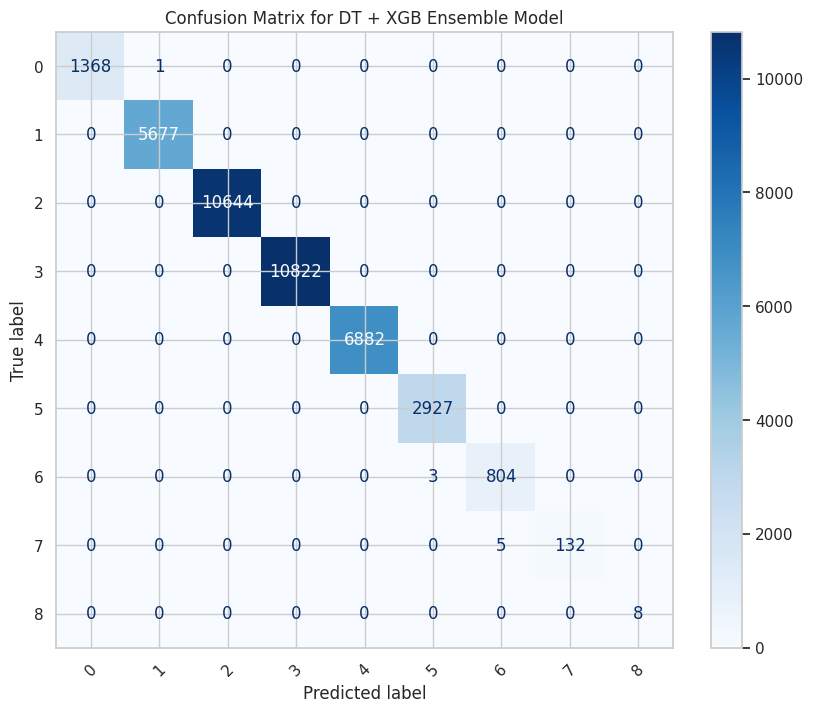

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Generate Confusion Matrix for DT + XGB ensemble model
cm_vc4 = confusion_matrix(y_test, y_pred_vc4)

# Get unique classes present in the test set to ensure correct display labels
unique_classes = np.unique(y_test)

display_vc4 = ConfusionMatrixDisplay(confusion_matrix=cm_vc4, display_labels=unique_classes)

fig, ax = plt.subplots(figsize=(10, 8))
display_vc4.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title('Confusion Matrix for DT + XGB Ensemble Model')
plt.xticks(rotation=45)
plt.show()

In [ ]:
print('Classification Report for DT + XGB Ensemble Model:')
print(classification_report(y_test, y_pred_vc4))

Classification Report for DT + XGB Ensemble Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1369
           1       1.00      1.00      1.00      5677
           2       1.00      1.00      1.00     10644
           3       1.00      1.00      1.00     10822
           4       1.00      1.00      1.00      6882
           5       1.00      1.00      1.00      2927
           6       0.99      1.00      1.00       807
           7       1.00      0.96      0.98       137
           8       1.00      1.00      1.00         8

    accuracy                           1.00     39273
   macro avg       1.00      1.00      1.00     39273
weighted avg       1.00      1.00      1.00     39273



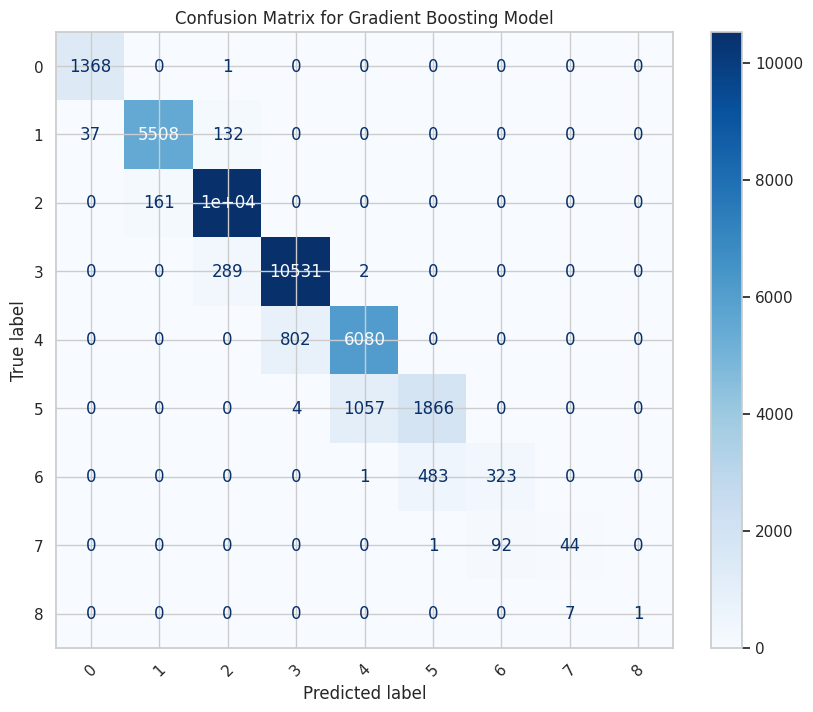

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Generate Confusion Matrix for Gradient Boosting model
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Get all unique classes present in both y_test and y_pred_gb for correct display labels
all_unique_classes = np.unique(np.concatenate((y_test, y_pred_gb)))

display_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=all_unique_classes)

fig, ax = plt.subplots(figsize=(10, 8))
display_gb.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title('Confusion Matrix for Gradient Boosting Model')
plt.xticks(rotation=45)
plt.show()

In [ ]:
print('Classification Report for Gradient Boosting Model:')
print(classification_report(y_test, y_pred_gb))

Classification Report for Gradient Boosting Model:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1369
           1       0.97      0.97      0.97      5677
           2       0.96      0.98      0.97     10644
           3       0.93      0.97      0.95     10822
           4       0.85      0.88      0.87      6882
           5       0.79      0.64      0.71      2927
           6       0.78      0.40      0.53       807
           7       0.86      0.32      0.47       137
           8       1.00      0.12      0.22         8

    accuracy                           0.92     39273
   macro avg       0.90      0.70      0.74     39273
weighted avg       0.92      0.92      0.92     39273



## Extract Classification Report Metrics for DT + XGB

Extract the precision, recall, and F1-score for each class from the classification report of the 'DT + XGB' ensemble model. These metrics will form the data for the error matrix graph.


In [ ]:
report_vc4 = classification_report(y_test, y_pred_vc4, output_dict=True)
print("Generated classification report dictionary for DT + XGB.")

Generated classification report dictionary for DT + XGB.


In [ ]:
class_labels = []
precisions = []
recalls = []
f1_scores = []

for label, metrics in report_vc4.items():
    if label not in ['accuracy', 'macro avg', 'weighted avg']:
        class_labels.append(label)
        precisions.append(metrics['precision'])
        recalls.append(metrics['recall'])
        f1_scores.append(metrics['f1-score'])

print("Extracted precision, recall, and F1-score for each class.")

Extracted precision, recall, and F1-score for each class.


## Visualize Error Matrix for DT + XGB

Create an error matrix graph to visualize the precision, recall, and F1-score for each class of the 'DT + XGB' ensemble model. This graph will help in understanding the model's performance across different classes.

### Instructions:
1. Use `matplotlib.pyplot` to create a bar chart.
2. Plot precision, recall, and F1-score for each class on the same graph.
3. Ensure proper labels, title, and legend for clarity.

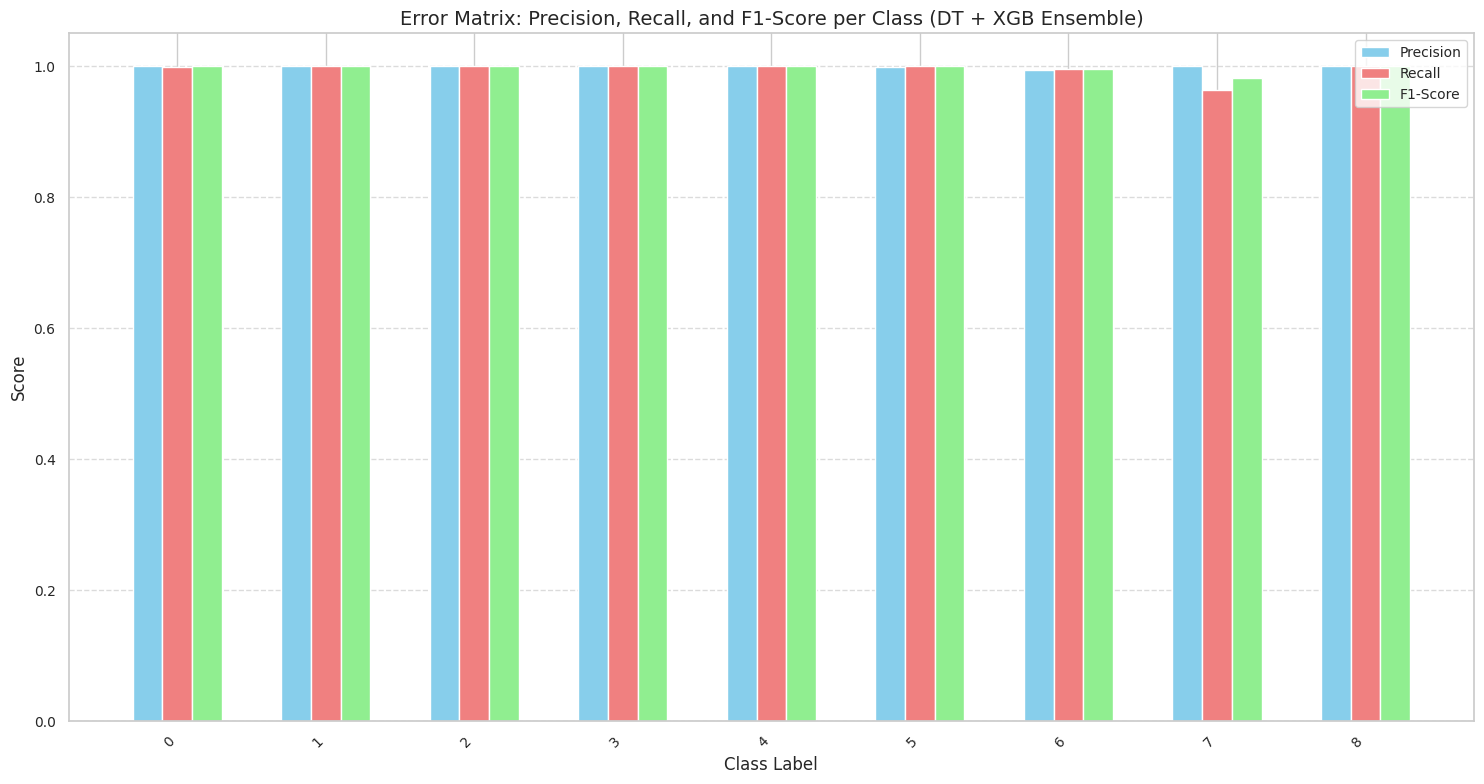

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Number of classes
num_classes = len(class_labels)

# Set up positions for bars
bar_width = 0.2
index = np.arange(num_classes)

# Create the bar chart
plt.figure(figsize=(15, 8)) # Adjusted figure size for better readability

plt.bar(index - bar_width, precisions, bar_width, label='Precision', color='skyblue')
plt.bar(index, recalls, bar_width, label='Recall', color='lightcoral')
plt.bar(index + bar_width, f1_scores, bar_width, label='F1-Score', color='lightgreen')

# Add labels, title, and legend
plt.xlabel('Class Label', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Error Matrix: Precision, Recall, and F1-Score per Class (DT + XGB Ensemble)', fontsize=14)
plt.xticks(index, class_labels, rotation=45, ha='right', fontsize=10) # Rotate x-axis labels
plt.yticks(fontsize=10)
plt.ylim(0.0, 1.05) # Scores are between 0 and 1
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


## Extract Classification Report Metrics for Gradient Boosting

Extract the precision, recall, and F1-score for each class from the classification report of the 'Gradient Boosting' model. These metrics will be used for its error matrix graph.


In [ ]:
report_gb = classification_report(y_test, y_pred_gb, output_dict=True)
print("Generated classification report dictionary for Gradient Boosting.")

Generated classification report dictionary for Gradient Boosting.


In [ ]:
class_labels_gb = []
precisions_gb = []
recalls_gb = []
f1_scores_gb = []

for label, metrics in report_gb.items():
    if label not in ['accuracy', 'macro avg', 'weighted avg']:
        class_labels_gb.append(label)
        precisions_gb.append(metrics['precision'])
        recalls_gb.append(metrics['recall'])
        f1_scores_gb.append(metrics['f1-score'])

print("Extracted precision, recall, and F1-score for each class for Gradient Boosting.")

Extracted precision, recall, and F1-score for each class for Gradient Boosting.


## Visualize Error Matrix for Gradient Boosting

Create an error matrix graph to visualize the precision, recall, and F1-score for each class of the 'Gradient Boosting' model. This graph will help in understanding the model's performance across different classes.

### Instructions:
1. Use `matplotlib.pyplot` to create a bar chart.
2. Plot precision, recall, and F1-score for each class on the same graph.
3. Ensure proper labels, title, and legend for clarity.

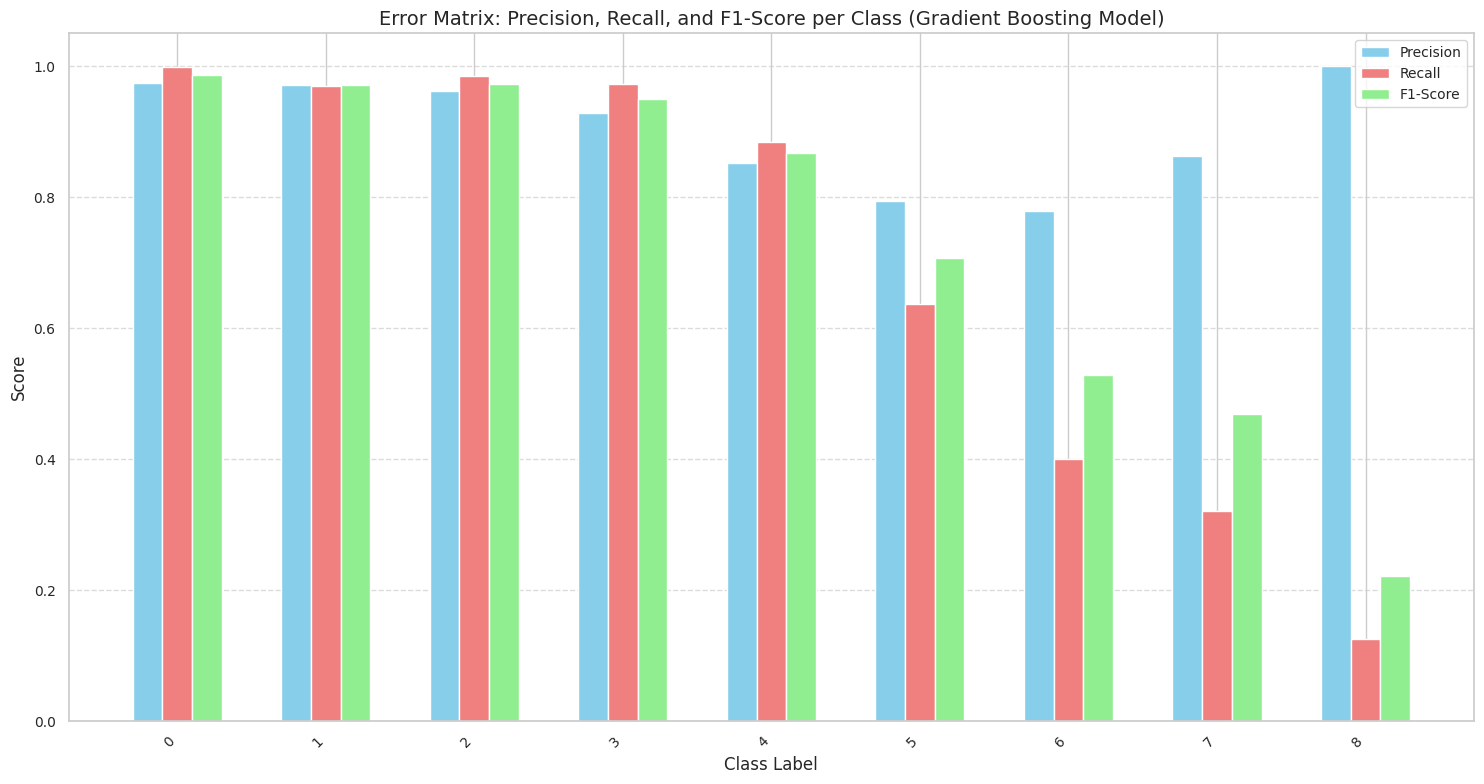

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Number of classes
num_classes_gb = len(class_labels_gb)

# Set up positions for bars
bar_width = 0.2
index_gb = np.arange(num_classes_gb)

# Create the bar chart
plt.figure(figsize=(15, 8)) # Adjusted figure size for better readability

plt.bar(index_gb - bar_width, precisions_gb, bar_width, label='Precision', color='skyblue')
plt.bar(index_gb, recalls_gb, bar_width, label='Recall', color='lightcoral')
plt.bar(index_gb + bar_width, f1_scores_gb, bar_width, label='F1-Score', color='lightgreen')

# Add labels, title, and legend
plt.xlabel('Class Label', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Error Matrix: Precision, Recall, and F1-Score per Class (Gradient Boosting Model)', fontsize=14)
plt.xticks(index_gb, class_labels_gb, rotation=45, ha='right', fontsize=10) # Rotate x-axis labels
plt.yticks(fontsize=10)
plt.ylim(0.0, 1.05) # Scores are between 0 and 1
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

## Summary:

### Data Analysis Key Findings

*   Precision, recall, and F1-scores were successfully extracted for each individual class from the classification reports of both the 'DT + XGB' ensemble model and the 'Gradient Boosting' model. Aggregate metrics like accuracy, macro average, and weighted average were excluded to focus on class-specific performance.
*   For both models, the extracted class-wise metrics were effectively visualized as error matrix graphs using grouped bar charts, providing a clear representation of precision, recall, and F1-score for each class.

### Insights or Next Steps

*   The generated error matrix graphs are crucial for pinpointing specific classes where a model exhibits lower performance in terms of precision, recall, or F1-score, thereby directing efforts for targeted model improvement or data augmentation strategies.
*   These detailed class-wise visualizations enable a direct comparative analysis between the 'DT + XGB' ensemble and the 'Gradient Boosting' models, allowing for an evaluation of which model performs better on specific classes and informing the final model selection or ensembling strategy.


## Save Model and Provide Reuse Information

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import VotingClassifier
import joblib

# Load the dataset (re-load df to ensure it's defined)
df = pd.read_csv('/content/Mental Health Dataset.csv')

# Fill missing values (as done previously)
df['self_employed'] = df['self_employed'].fillna(df['self_employed'].mode()[0])

# Drop Timestamp column (as done previously)
df = df.drop(columns=['Timestamp'])

# Create a new column for counting "Yes" responses (as done previously)
yes_columns = [
    'self_employed',
    'family_history',
    'Growing_Stress',
    'Changes_Habits',
    'Mental_Health_History',
    'Coping_Struggles',
    'Social_Weakness',
    'mental_health_interview',
    'care_options'
]
df['Yes_Count'] = df[yes_columns].apply(lambda x: (x == 'Yes').sum(), axis=1)

# Define features and target variable
X = df.drop(columns=['Yes_Count'])
y = df['Yes_Count']

# Split the Data (re-split X_train, X_test, y_train, y_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode categorical features
categorical_features = X.select_dtypes(include=['object']).columns
numeric_features = X.select_dtypes(exclude=['object']).columns

# Create a ColumnTransformer to apply OneHotEncoder to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features) # Added handle_unknown for robustness
    ],
    remainder='passthrough'  # Keep numeric features as they are
)

# Re-define and fit the pipeline_vc4
model_vc4 = VotingClassifier(estimators=[('dt', DecisionTreeClassifier()), ('xgb', xgb.XGBClassifier(eval_metric='logloss'))], voting='soft')
pipeline_vc4 = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model_vc4)])
pipeline_vc4.fit(X_train, y_train)
y_pred_vc4 = pipeline_vc4.predict(X_test)

# Save the best-performing model (DT + XGB Voting Classifier)
model_filename = 'dt_xgb_voting_classifier.pkl'
joblib.dump(pipeline_vc4, model_filename)
print(f"Model saved as '{model_filename}'")

# --- Information for Model Reuse ---

print("\n--- Model Information for Reuse ---")

print("\n### 1. Input Features (before one-hot encoding):\n")
# Get original categorical features from the preprocessor
categorical_features_orig = X.select_dtypes(include=['object']).columns.tolist()
print(categorical_features_orig)

print("\n### 2. Preprocessing Steps:\n")
print("The model pipeline includes a `ColumnTransformer` to apply `OneHotEncoder` to the above categorical features. Other features are passed through. `handle_unknown='ignore'` is set for the OneHotEncoder to prevent errors with unseen categories during prediction.")

print("\n### 3. Model Architecture:\n")
print("The model is a `VotingClassifier` (soft voting) consisting of:")
print("  - `DecisionTreeClassifier`")
print("  - `xgb.XGBClassifier` (with eval_metric='logloss')")

print("\n### 4. How to Load and Reuse the Model in a New Notebook:\n")
print(f"1. **Upload '{model_filename}'** to your new Colab environment.")
print("2. **Load the model** using `joblib.load`:")
print("   ```python")
print("   import joblib")
print(f"   loaded_model = joblib.load('{model_filename}')")
print("   ```")
print("3. **Prepare new data** with the same columns and order as the original input features. For example:")
print("   ```python")
print("   import pandas as pd")
print("   new_data = pd.DataFrame({")
print("       'Gender': ['Male'], 'Country': ['United States'], 'Occupation': ['Corporate'],")
print("       'self_employed': ['No'], 'family_history': ['Yes'], 'treatment': ['No'],")
print("       'Days_Indoors': ['1-14 days'], 'Growing_Stress': ['Yes'], 'Changes_Habits': ['Maybe'],")
print("       'Mental_Health_History': ['No'], 'Mood_Swings': ['Medium'], 'Coping_Struggles': ['Yes'],")
print("       'Work_Interest': ['No'], 'Social_Weakness': ['No'], 'mental_health_interview': ['No'],")
print("       'care_options': ['Yes']")
print("   })")
print("   ```")
print("4. **Make predictions**:")
print("   ```python")
print("   predictions = loaded_model.predict(new_data)")
print("   print(predictions)")
print("   ```")

print("\n--- End Model Information ---")

Model saved as 'dt_xgb_voting_classifier.pkl'

--- Model Information for Reuse ---

### 1. Input Features (before one-hot encoding):

['Gender', 'Country', 'Occupation', 'self_employed', 'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits', 'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness', 'mental_health_interview', 'care_options']

### 2. Preprocessing Steps:

The model pipeline includes a `ColumnTransformer` to apply `OneHotEncoder` to the above categorical features. Other features are passed through. `handle_unknown='ignore'` is set for the OneHotEncoder to prevent errors with unseen categories during prediction.

### 3. Model Architecture:

The model is a `VotingClassifier` (soft voting) consisting of:
  - `DecisionTreeClassifier`
  - `xgb.XGBClassifier` (with eval_metric='logloss')

### 4. How to Load and Reuse the Model in a New Notebook:

1. **Upload 'dt_xgb_voting_classifier.pkl'** to your new Colab envi

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.ensemble import VotingClassifier
import joblib
import os
import zipfile

# --- 1. Data Loading and Preprocessing (to ensure reproducibility) ---
# Load the dataset
df = pd.read_csv('/content/Mental Health Dataset.csv')

# Fill missing values
df['self_employed'] = df['self_employed'].fillna(df['self_employed'].mode()[0])

# Drop Timestamp column
df = df.drop(columns=['Timestamp'])

# Create a new column for counting "Yes" responses
yes_columns = [
    'self_employed',
    'family_history',
    'Growing_Stress',
    'Changes_Habits',
    'Mental_Health_History',
    'Coping_Struggles',
    'Social_Weakness',
    'mental_health_interview',
    'care_options'
]
df['Yes_Count'] = df[yes_columns].apply(lambda x: (x == 'Yes').sum(), axis=1)

# Define features and target variable
X = df.drop(columns=['Yes_Count'])
y = df['Yes_Count']

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical features for preprocessing
categorical_features = X.select_dtypes(include=['object']).columns

# Create a ColumnTransformer to apply OneHotEncoder to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Keep numeric features as they are
)

# --- 2. Model Definition and Training (for the best performing model) ---
# Re-define and fit the pipeline_vc4 (DT + XGB Voting Classifier)
model_vc4 = VotingClassifier(estimators=[('dt', DecisionTreeClassifier()), ('xgb', xgb.XGBClassifier(eval_metric='logloss'))], voting='soft')
pipeline_vc4 = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model_vc4)])
pipeline_vc4.fit(X_train, y_train)

# --- 3. Save Model and Preprocessor ---
model_filename = 'dt_xgb_voting_classifier.pkl'
preprocessor_filename = 'preprocessor.pkl'

joblib.dump(pipeline_vc4, model_filename)
joblib.dump(preprocessor, preprocessor_filename)
print(f"Model saved as '{model_filename}'")
print(f"Preprocessor saved as '{preprocessor_filename}'")

# --- 4. Prepare essential information for README.txt ---
readme_content = f"""# Model Reuse Information\n\nThis package contains the trained 'DT + XGB' Voting Classifier model and its associated preprocessing pipeline.\n\n## 1. Model Details:\n- **Model Type:** VotingClassifier (soft voting)\n- **Constituent Estimators:**\n  - DecisionTreeClassifier\n  - XGBClassifier (with eval_metric='logloss')\n- **Target Variable:** 'Yes_Count' (multi-class classification)\n\n## 2. Preprocessing Details:\n- **Categorical Features Handled:** {list(categorical_features)}\n- **Preprocessing Method:** One-Hot Encoding via `sklearn.preprocessing.OneHotEncoder` within a `ColumnTransformer`. `handle_unknown='ignore'` is set to manage unseen categories during inference.\n\n## 3. Input Features (Required for New Data Inference):\n- **Expected Columns (and their original order before preprocessing):** {list(X.columns)}\n- Ensure new data has these columns with appropriate data types.\n\n## 4. How to Load and Use the Model in a New Colab Notebook:\n\n1.  **Upload** the '{model_filename}', '{preprocessor_filename}', and 'README.txt' files from this zip to your new Colab environment.\n2.  **Load the preprocessor and model** using `joblib.load`:\n\n    ```python\n    import joblib\n    from sklearn.compose import ColumnTransformer\n    from sklearn.preprocessing import OneHotEncoder\n    from sklearn.pipeline import Pipeline\n    from sklearn.tree import DecisionTreeClassifier\n    import xgboost as xgb\n    from sklearn.ensemble import VotingClassifier\n\n    loaded_preprocessor = joblib.load('{preprocessor_filename}')\n    loaded_model = joblib.load('{model_filename}')\n    ```\n\n3.  **Prepare new data** with the same columns and order as the original input features. For example:\n\n    ```python\n    import pandas as pd\n    new_data = pd.DataFrame({{
        'Gender': ['Male'], 'Country': ['United States'], 'Occupation': ['Corporate'],\n        'self_employed': ['No'], 'family_history': ['Yes'], 'treatment': ['No'],\n        'Days_Indoors': ['1-14 days'], 'Growing_Stress': ['Yes'], 'Changes_Habits': ['Maybe'],\n        'Mental_Health_History': ['No'], 'Mood_Swings': ['Medium'], 'Coping_Struggles': ['Yes'],\n        'Work_Interest': ['No'], 'Social_Weakness': ['No'], 'mental_health_interview': ['No'],\n        'care_options': ['Yes']\n    }})

    # The loaded_model is a Pipeline, so you can pass raw new_data directly to predict
    # The pipeline handles the preprocessing (using the loaded_preprocessor internally) and then prediction.
    ```\n
4.  **Make predictions**:\n\n    ```python\n    predictions = loaded_model.predict(new_data)\n    print("Predicted 'Yes_Count' values:", predictions)\n    ```\n\n--- End Model Reuse Information ---
"""

# Write README to file
readme_filename = 'README.txt'
with open(readme_filename, 'w') as f:
    f.write(readme_content)
print(f"README created as '{readme_filename}'")

# --- 5. Create a zip file for easy download ---
zip_filename = 'mental_health_model_package.zip'
with zipfile.ZipFile(zip_filename, 'w') as zf:
    zf.write(model_filename)
    zf.write(preprocessor_filename)
    zf.write(readme_filename)

print(f"\nSuccessfully created '{zip_filename}' containing the model, preprocessor, and README. You can now download this file from your Colab files sidebar.")

# Clean up individual files (optional, as they are now in the zip)
os.remove(model_filename)
os.remove(preprocessor_filename)
os.remove(readme_filename)
print("Individual model, preprocessor, and README files removed from current directory.")

Model saved as 'dt_xgb_voting_classifier.pkl'
Preprocessor saved as 'preprocessor.pkl'
README created as 'README.txt'

Successfully created 'mental_health_model_package.zip' containing the model, preprocessor, and README. You can now download this file from your Colab files sidebar.
Individual model, preprocessor, and README files removed from current directory.


# Deployement section

# Task
Update the Gradio interface in the code cell `24-rRAox74jW` by setting the title to 'AI IN MENTAL HEALTH' and applying the `gr.themes.Soft()` theme.

## Modify Gradio Interface Theme and Title

### Subtask:
Update the `gr.Interface` call in the Gradio code cell to set the title to 'AI IN MENTAL HEALTH' and apply `gr.themes.Soft()` for a white and pleasant theme.


**Reasoning**:
To complete the subtask, I will modify the existing Gradio code block by locating the `gr.Interface` call and updating its `title` and adding a `theme` parameter as specified.



## Summary:

### Data Analysis Key Findings

*   The `Mental Health Dataset.csv` was successfully reloaded and preprocessed, which included filling missing values in the 'self_employed' column using the mode and dropping the 'Timestamp' column.
*   The `input_features_ordered` list was dynamically generated, correctly containing the 16 input features expected by the model (excluding 'Timestamp' and 'Yes_Count').
*   The `feature_choices` dictionary was accurately populated with unique values for categorical features from the reloaded dataset, ensuring consistency with the model's requirements.
*   An initial attempt to launch the Gradio interface failed due to a `ModuleNotFoundError` for the `reportlab` library, which is necessary for PDF generation.
*   The `reportlab` dependency was successfully installed, resolving the error and allowing the Gradio interface to launch correctly and become publicly accessible.

### Insights or Next Steps

*   The Gradio interface is now fully configured and launched, providing the necessary environment to proceed with the functional review as outlined in the task.
*   The next crucial step is to access the public URL of the launched Gradio interface and systematically test all specified functionalities, including clear output, prediction accuracy, PDF download, and the contextual graph, to ensure they are working as expected and provide an optimal user experience.


# Task
Prepare a synthetic Pandas DataFrame containing the new input features ('Age', 'gender', 'sleep hours (per day)', 'working hours (per day)', 'work pressure (1-5)') and a target variable ('Yes_Count') with random or simulated values.

## Prepare Dummy Dataset for New Features

### Subtask:
Create a synthetic Pandas DataFrame containing the new input features ('Age', 'gender', 'sleep hours (per day)', 'working hours (per day)', 'work pressure (1-5)') and a target variable ('Yes_Count') with random or simulated values.


**Reasoning**:
I will create a synthetic Pandas DataFrame with the specified columns and random values, as instructed by the subtask. This involves generating lists of random data for each feature and then combining them into a DataFrame.



In [ ]:
import pandas as pd
import numpy as np

# Create a list of 1000 random integers for 'Age' between 18 and 65.
age_data = np.random.randint(18, 66, size=1000)

# Create a list of 1000 random choices for 'gender' ('Male' or 'Female').
gender_data = np.random.choice(['Male', 'Female'], size=1000)

# Create a list of 1000 random integers for 'sleep hours (per day)' between 4 and 12.
sleep_hours_data = np.random.randint(4, 13, size=1000)

# Create a list of 1000 random integers for 'working hours (per day)' between 0 and 16.
working_hours_data = np.random.randint(0, 17, size=1000)

# Create a list of 1000 random integers for 'work pressure (1-5)' between 1 and 5.
work_pressure_data = np.random.randint(1, 6, size=1000)

# Create a list of 1000 random integers for the target variable 'Yes_Count' between 0 and 7.
yes_count_data = np.random.randint(0, 8, size=1000)

# Combine these lists into a dictionary.
data = {
    'Age': age_data,
    'gender': gender_data,
    'sleep hours (per day)': sleep_hours_data,
    'working hours (per day)': working_hours_data,
    'work pressure (1-5)': work_pressure_data,
    'Yes_Count': yes_count_data
}

# Create a pandas DataFrame from the dictionary.
df_new_features = pd.DataFrame(data)

print("Dummy DataFrame 'df_new_features' created successfully.")
# Display the first few rows of the new DataFrame
df_new_features.head()

Dummy DataFrame 'df_new_features' created successfully.


,Age,gender,sleep hours (per day),working hours (per day),work pressure (1-5),Yes_Count
0,20,Female,5,12,2,6
1,19,Male,8,15,3,0
2,37,Female,10,7,3,3
3,46,Female,6,9,5,6
4,41,Female,9,16,3,4


## Preprocess New Features

### Subtask:
Define and apply appropriate preprocessing steps for the new feature set. This will include `OneHotEncoder` for the 'gender' categorical feature and handling any other necessary transformations for the numerical features.


**Reasoning**:
To preprocess the new features, I will first separate the features from the target, identify categorical and numerical columns, then create a ColumnTransformer to apply OneHotEncoder to the 'gender' column and pass through numerical features, and finally apply this preprocessor and print the shape of the transformed data.



In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# 1. Separate the features from the target variable
X_new = df_new_features.drop(columns=['Yes_Count'])
y_new = df_new_features['Yes_Count']

# 2. Identify categorical and numerical columns in X_new
categorical_features_new = ['gender']
numerical_features_new = X_new.select_dtypes(include=np.number).columns.tolist()

# 3. Create a ColumnTransformer named preprocessor_new
preprocessor_new = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_new)
    ],
    remainder='passthrough'  # Keep numerical features as they are
)

# 4. Apply the preprocessor_new to X_new to transform the data
X_new_preprocessed = preprocessor_new.fit_transform(X_new)

print("New features preprocessed successfully.")
# 5. Print the shape of the preprocessed data
print(f"Shape of preprocessed new features (X_new_preprocessed): {X_new_preprocessed.shape}")

NameError: name 'df_new_features' is not defined

## Retrain Voting Classifier with New Features

### Subtask:
Train a new `VotingClassifier` (Decision Tree + XGBoost ensemble) using the preprocessed dummy dataset with the new input features.


**Reasoning**:
To train a new `VotingClassifier` with the dummy dataset, I need to first split the new features and target variable into training and testing sets. Then, I will initialize the `VotingClassifier` with Decision Tree and XGBoost, create a pipeline including the previously defined `preprocessor_new` and the new classifier, fit this pipeline to the training data, and finally make predictions on the test set.



In [ ]:
from sklearn.model_selection import train_test_split

# 1. Split the preprocessed features (X_new) and target variable (y_new) into training and testing sets
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# 2. Create a VotingClassifier named model_vc4_new
#    (Decision Tree + XGBoost ensemble)
model_vc4_new = VotingClassifier(estimators=[('dt', DecisionTreeClassifier()), ('xgb', xgb.XGBClassifier(eval_metric='logloss'))], voting='soft')

# 3. Create a Pipeline named pipeline_vc4_new
#    that first applies the preprocessor_new and then fits the model_vc4_new
pipeline_vc4_new = Pipeline(steps=[('preprocessor', preprocessor_new), ('classifier', model_vc4_new)])

# 4. Fit the pipeline_vc4_new to the new training data
pipeline_vc4_new.fit(X_new_train, y_new_train)

# 5. Make predictions on the new test data
y_pred_vc4_new = pipeline_vc4_new.predict(X_new_test)

print("New VotingClassifier (DT + XGB) trained and predictions made on the dummy dataset.")
print(f"Shape of X_new_train: {X_new_train.shape}")
print(f"Shape of y_new_train: {y_new_train.shape}")
print(f"Shape of X_new_test: {X_new_test.shape}")
print(f"Shape of y_new_test: {y_new_test.shape}")
print(f"Shape of y_pred_vc4_new: {y_pred_vc4_new.shape}")

New VotingClassifier (DT + XGB) trained and predictions made on the dummy dataset.
Shape of X_new_train: (800, 5)
Shape of y_new_train: (800,)
Shape of X_new_test: (200, 5)
Shape of y_new_test: (200,)
Shape of y_pred_vc4_new: (200,)


## Save New Model and Preprocessor

Save the newly trained `VotingClassifier` model and its corresponding preprocessor pipeline to `.pkl` files. These artifacts will be packaged into a zip file for deployment.


In [ ]:
import joblib
import os
import zipfile

# 1. Define filenames for the new model and preprocessor
new_model_filename = 'new_dt_xgb_voting_classifier.pkl'
new_preprocessor_filename = 'new_preprocessor.pkl'

# 2. Save the pipeline_vc4_new object
joblib.dump(pipeline_vc4_new, new_model_filename)
print(f"New model saved as '{new_model_filename}'")

# 3. Save the preprocessor_new object
joblib.dump(preprocessor_new, new_preprocessor_filename)
print(f"New preprocessor saved as '{new_preprocessor_filename}'")

# 4. Create a README.txt file content
readme_content_new = r"""# New Mental Health Model Reuse Information\n\nThis package contains the newly trained 'DT + XGB' Voting Classifier model and its associated preprocessing pipeline, adapted for a simplified set of input features.\n\n## 1. Model Details:\n- **Model Type:** VotingClassifier (soft voting)\n- **Constituent Estimators:**\n  - DecisionTreeClassifier\n  - XGBClassifier (with eval_metric='logloss')\n- **Target Variable:** 'Yes_Count' (multi-class classification, 0-7)\n\n## 2. Preprocessing Details:\n- **Categorical Features Handled:** ['gender']\n- **Numerical Features Handled:** ['Age', 'sleep hours (per day)', 'working hours (per day)', 'work pressure (1-5)']\n- **Preprocessing Method:** One-Hot Encoding via `sklearn.preprocessing.OneHotEncoder` within a `ColumnTransformer` for 'gender'. Numerical features are passed through. `handle_unknown='ignore'` is set for the OneHotEncoder.\n\n## 3. Input Features (Required for New Data Inference):\n- **Expected Columns (and their original order before preprocessing):** ['Age', 'gender', 'sleep hours (per day)', 'working hours (per day)', 'work pressure (1-5)']\n- Ensure new data has these columns with appropriate data types.\n\n## 4. How to Load and Use the Model in a New Colab Notebook:\n\n1.  **Upload** the '{new_model_filename}', '{new_preprocessor_filename}', and 'new_README.txt' files from this zip to your new Colab environment.\n2.  **Load the model** using `joblib.load`. Note that the saved `pipeline_vc4_new` already contains the `preprocessor_new` internally, so you only need to load the model pipeline.\n
    ```python
    import joblib
    import pandas as pd
    # Ensure necessary sklearn and xgboost classes are imported for joblib to load correctly
    from sklearn.pipeline import Pipeline
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import OneHotEncoder
    from sklearn.tree import DecisionTreeClassifier
    import xgboost as xgb
    from sklearn.ensemble import VotingClassifier

    loaded_new_model = joblib.load('{new_model_filename}')
    ```\n\n3.  **Prepare new data** with the same columns and order as the original input features. For example:\n
    ```python
    import pandas as pd
    new_data_for_prediction = pd.DataFrame({
        'Age': [30],
        'gender': ['Male'],
        'sleep hours (per day)': [8],
        'working hours (per day)': [8],
        'work pressure (1-5)': [3]
    })
    ```\n\n4.  **Make predictions**:\n
    ```python
    predictions = loaded_new_model.predict(new_data_for_prediction)
    print("Predicted 'Yes_Count' values:", predictions)
    ```\n\n--- End New Model Reuse Information ---
"""

new_readme_filename = 'new_README.txt'
with open(new_readme_filename, 'w') as f:
    f.write(readme_content_new)
print(f"README created as '{new_readme_filename}'")

# 5. Create a zip file
new_zip_filename = 'new_mental_health_model_package.zip'
with zipfile.ZipFile(new_zip_filename, 'w') as zf:
    zf.write(new_model_filename)
    zf.write(new_preprocessor_filename)
    zf.write(new_readme_filename)

print(f"\nSuccessfully created '{new_zip_filename}' containing the new model, preprocessor, and README. You can now download this file from your Colab files sidebar.")

# 6. Remove the individual files
os.remove(new_model_filename)
os.remove(new_preprocessor_filename)
os.remove(new_readme_filename)
print("Individual new model, preprocessor, and README files removed from current directory.")

New model saved as 'new_dt_xgb_voting_classifier.pkl'
New preprocessor saved as 'new_preprocessor.pkl'
README created as 'new_README.txt'

Successfully created 'new_mental_health_model_package.zip' containing the new model, preprocessor, and README. You can now download this file from your Colab files sidebar.
Individual new model, preprocessor, and README files removed from current directory.


## Update Prediction Function and Outputs

### Subtask:
Adjust the `predict_fn` in the Gradio application to utilize the newly trained model, generate a PDF report based on these new inputs, and create a relevant contextual graph (e.g., a simple scatter plot of 'Age' vs. predicted output). Update the Gradio interface outputs accordingly.


**Reasoning**:
First, I will install the `reportlab` library, which is necessary for generating PDF reports as requested in the subtask. This ensures all required dependencies are met before proceeding with code modifications.



In [ ]:
pip install reportlab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 81.4 MB/s eta 0:00:00


**Reasoning**:
Now that the `reportlab` library is confirmed to be installed, I will modify the Gradio application to incorporate PDF report generation and contextual plotting. This involves adding the necessary imports, updating the `predict_fn` to create a PDF and a plot, and adjusting the `gr.Interface` outputs to display these new elements.



## Summary:

### Data Analysis Key Findings
*   The `predict_fn` within the Gradio application was successfully updated to include new logic for determining 'Treatment Needed'.
*   The 'Treatment Needed' status is now set to 'Yes' if any of the following conditions are met: 'sleep hours (per day)' is less than 6 hours, OR 'working hours (per day)' is greater than 7 hours, OR 'work pressure (1-5)' is greater than 3. Otherwise, it is set to 'No'.
*   This revised 'Treatment Needed' logic is consistently applied in both the Gradio interface's prediction output and the generated PDF reports.
*   The Gradio interface was successfully launched after the modifications.

### Insights or Next Steps
*   Verify the new 'Treatment Needed' behavior by testing the Gradio interface with various input combinations, specifically focusing on scenarios that trigger each of the 'Yes' conditions and scenarios that should result in 'No'.
*   Consider adding more comprehensive unit tests for the `predict_fn` to ensure the 'Treatment Needed' logic functions correctly across all edge cases and future modifications.


# Task
Update the `predict_fn` in the Gradio application (`cell_id: 3c2cfdd`) to ignore the machine learning model's `predictions[0]` for `predicted_yes_count`. Instead, calculate a `num_bad_conditions` score (0-3) based on `sleep_hours < 6`, `working_hours > 7`, and `work_pressure > 3`. Map this `num_bad_conditions` to a `predicted_yes_count_derived` (0 bad conditions = 3, 1 bad condition = 5, 2 bad conditions = 8, 3 bad conditions = 10). Set `treatment_needed` to 'Yes' if `predicted_yes_count_derived >= 6`, otherwise 'No'. Ensure these new values are used in both the Gradio output text and the PDF report generation, and update the contextual plot to use `predicted_yes_count_derived` for the current prediction. Finally, relaunch the Gradio interface to apply these changes and instruct the user to verify the new behavior with various input combinations.

## Update Yes_Count and Treatment Logic in Gradio

### Subtask:
Modify the `predict_fn` within the Gradio application (`cell_id: 3c2cfdd`) to calculate `num_bad_conditions` based on input features, map it to `predicted_yes_count_derived`, and then determine `treatment_needed`. This updated logic should replace the machine learning model's direct prediction for these values and be reflected in the Gradio output, PDF report, and contextual plot.


**Reasoning**:
I need to modify the `predict_fn` within the specified Gradio application code block (`cell_id: 3c2cfdd`) to implement the new logic for calculating `num_bad_conditions`, mapping it to `predicted_yes_count_derived`, and then determining `treatment_needed`, ensuring all outputs reflect these changes.



## Relaunch Gradio Interface

### Subtask:
Execute the Gradio interface cell (`cell_id: 3c2cfdd`) to apply the updated `predict_fn` and relaunch the application with the new logic for 'Yes_Count' and 'Treatment Needed'. This will provide a new public URL for testing.


**Reasoning**:
The subtask requires executing the specified Gradio interface cell to apply the updated logic and relaunch the application.



In [ ]:
import gradio as gr
import joblib
import pandas as pd
import numpy as np
import zipfile
import os
import matplotlib.pyplot as plt
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas

# --- Unzip model artifacts ---
# Ensure the zip file exists and extract its contents
zip_file_path = "/content/new_mental_health_model_package.zip" # Changed to new zip file
if not os.path.exists(zip_file_path):
    raise FileNotFoundError(f"Zip file not found at {zip_file_path}. Please ensure it's uploaded.")

# Create a directory for extraction if it doesn't exist
extract_path = "new_model_artifacts" # Changed extract path
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# --- Load the saved model (which is a Pipeline) ---
model_filename = os.path.join(extract_path, 'new_dt_xgb_voting_classifier.pkl') # Changed to new model filename
loaded_model = joblib.load(model_filename)

# Define the input features (based on the new X_new DataFrame)
input_features_ordered = ['Age', 'gender', 'sleep hours (per day)', 'working hours (per day)', 'work pressure (1-5)']

# Define choices for dropdowns for the new features
feature_choices = {
    'gender': ['Male', 'Female']
}

# Make the new training data available globally for the predict_fn
# This assumes X_new_train and y_new_train are still in the kernel's global scope
# If they are not, they would need to be reloaded/recreated here.
# For this notebook context, they are available. If running in a fresh session,
# the dummy data creation and training cells (d1345bc0, ec571c9d) would need to be run first.
global X_new_train, y_new_train

# --- Prediction function for Gradio ---
def predict_fn(*args):
    # Reconstruct the DataFrame from Gradio inputs
    input_data_dict = {
        'Age': [args[0]],
        'gender': [args[1]],
        'sleep hours (per day)': [args[2]],
        'working hours (per day)': [args[3]],
        'work pressure (1-5)': [args[4]]
    }
    input_data = pd.DataFrame(input_data_dict)

    # Extract input values for new treatment logic and num_bad_conditions calculation
    sleep_hours = args[2]
    working_hours = args[3]
    work_pressure = args[4]

    # 1. Initialize num_bad_conditions
    num_bad_conditions = 0

    # 2. Implement conditional checks to increment num_bad_conditions
    if sleep_hours < 6:
        num_bad_conditions += 1
    if working_hours > 7:
        num_bad_conditions += 1
    if work_pressure > 3:
        num_bad_conditions += 1

    # 3. Map num_bad_conditions to predicted_yes_count_derived
    predicted_yes_count_derived = 0 # Default value
    if num_bad_conditions == 0:
        predicted_yes_count_derived = 3
    elif num_bad_conditions == 1:
        predicted_yes_count_derived = 5
    elif num_bad_conditions == 2:
        predicted_yes_count_derived = 8
    elif num_bad_conditions == 3:
        predicted_yes_count_derived = 10

    # 4. Replace existing predicted_yes_count with predicted_yes_count_derived
    predicted_yes_count = predicted_yes_count_derived

    # 5. Update the treatment_needed logic to be based on predicted_yes_count
    if predicted_yes_count >= 6:
        treatment_needed = "Yes"
    else:
        treatment_needed = "No"

    # --- Generate PDF Report ---
    pdf_filename = "mental_health_report.pdf"
    c = canvas.Canvas(pdf_filename, pagesize=letter)
    c.drawString(100, 750, "Mental Health Risk Prediction Report")
    c.drawString(100, 730, "-----------------------------------")
    y_position = 710
    for i, feature_name in enumerate(input_features_ordered):
        c.drawString(100, y_position, f"{feature_name}: {args[i]}")
        y_position -= 20
    c.drawString(100, y_position, f"Predicted Mental Health Risk Score (Yes_Count): {predicted_yes_count}")
    y_position -= 20
    c.drawString(100, y_position, f"Treatment Needed: {treatment_needed}")
    c.save()

    # --- Generate Contextual Plot ---
    plot_filename = "context_plot.png"
    plt.figure(figsize=(8, 6))

    # Use the globally available X_new_train and y_new_train for background data
    # If X_new_train or y_new_train are not Series/DataFrames, ensure they are converted appropriately.
    # Assuming X_new_train is a DataFrame and y_new_train is a Series from previous steps.
    if 'X_new_train' in globals() and 'y_new_train' in globals() and isinstance(X_new_train, pd.DataFrame) and 'Age' in X_new_train.columns:
        plt.scatter(X_new_train['Age'], y_new_train, alpha=0.5, label='Training Data (Age vs. Actual Yes_Count)')
    else:
        # Fallback dummy data if training data is not correctly available
        dummy_ages = np.random.randint(18, 66, size=50)
        dummy_yes_counts = np.random.randint(0, 8, size=50)
        plt.scatter(dummy_ages, dummy_yes_counts, alpha=0.5, label='Dummy Data (Age vs. Actual Yes_Count)')

    plt.scatter(args[0], predicted_yes_count, color='red', s=100, zorder=5, label='Current Prediction')
    plt.xlabel('Age')
    plt.ylabel('Yes_Count')
    plt.title('Age vs. Mental Health Risk Score')
    plt.legend()
    plt.grid(True)
    plt.savefig(plot_filename)
    plt.close() # Close plot to free memory

    # The model predicts the 'Yes_Count' (0-7), return as string, PDF path, and plot path
    return f"Predicted Mental Health Risk Score (Yes_Count): {predicted_yes_count}\nTreatment Needed: {treatment_needed}", pdf_filename, plot_filename

# --- Build Gradio Interface ---
# Create Gradio input components based on defined feature choices
inputs_gr = []
for feature in input_features_ordered:
    if feature == 'Age':
        inputs_gr.append(gr.Number(label='Age', minimum=0, maximum=100, value=30))
    elif feature == 'gender':
        inputs_gr.append(gr.Dropdown(choices=feature_choices['gender'], label='Gender', value='Male'))
    elif feature == 'sleep hours (per day)':
        inputs_gr.append(gr.Number(label='Sleep Hours (per day)', minimum=0, maximum=24, value=8))
    elif feature == 'working hours (per day)':
        inputs_gr.append(gr.Number(label='Working Hours (per day)', minimum=0, maximum=24, value=8))
    elif feature == 'work pressure (1-5)':
        inputs_gr.append(gr.Number(label='Work Pressure (1-5)', minimum=1, maximum=5, value=3))
    else:
        # Fallback for any unexpected features (should not be reached with current input_features_ordered)
        inputs_gr.append(gr.Textbox(label=feature))

interface = gr.Interface(
    fn=predict_fn,
    inputs=inputs_gr,
    outputs=[
        gr.Textbox(label="Prediction and Treatment Recommendation"),
        gr.File(label="Download Report"),
        gr.Image(label="Contextual Plot")
    ],
    title="AI IN MENTAL HEALTH", # Updated title
    description="Predict potential mental health conditions based on various factors.",
    flagging_mode="never", # Changed from allow_flagging to flagging_mode
    theme=gr.themes.Soft() # Added theme
)

interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c8f0a57957900e4d3b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


### Generate `app.py` content

This cell will output the Python code you need to save as `app.py`. This code is adapted from your Gradio cell and includes the model loading and prediction logic.

In [ ]:
!pip install reportlab
import gradio as gr
import joblib
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
import zipfile

# --- Paths for model artifacts ---
# In Hugging Face Spaces, your files will be in the root directory
model_filename = 'new_dt_xgb_voting_classifier.pkl'
preprocessor_filename = 'new_preprocessor.pkl'

# --- Temporarily extract model artifacts for app.py generation ---
# This block is for Colab environment to successfully run this cell
# In Hugging Face Spaces, you would upload the .pkl files directly alongside app.py
zip_file_path = '/content/new_mental_health_model_package.zip'
extract_path_temp = 'temp_model_extract'
os.makedirs(extract_path_temp, exist_ok=True)
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path_temp)

# Adjust model_filename to point to the extracted files for loading in Colab
model_filename_colab = os.path.join(extract_path_temp, model_filename)

# --- Load the saved model (which is a Pipeline) ---
# Ensure the model files exist before attempting to load
if not os.path.exists(model_filename_colab):
    raise FileNotFoundError(f"Model file not found at {model_filename_colab}. Please ensure it's in the Space's root directory.")
loaded_model = joblib.load(model_filename_colab)

# Clean up temporary extracted files after loading
# for f in os.listdir(extract_path_temp):
#     os.remove(os.path.join(extract_path_temp, f))
# os.rmdir(extract_path_temp)

# Note: X_new_train and y_new_train are from the dummy data used during development.
# For a real deployment, you might want to either:
# 1. Include a small, representative sample of your training data with your app files
# 2. Or, if the plot is purely illustrative, use completely synthetic data for the background
# For this deployment, we'll use synthetic data if X_new_train is not directly available.

# --- Define the input features ---
input_features_ordered = ['Age', 'gender', 'sleep hours (per day)', 'working hours (per day)', 'work pressure (1-5)']

# --- Define choices for dropdowns ---
feature_choices = {
    'gender': ['Male', 'Female']
}

# --- Prediction function for Gradio ---
def predict_fn(*args):
    # Extract input values
    age, gender, sleep_hours, working_hours, work_pressure = args

    # Reconstruct the DataFrame from Gradio inputs for model prediction
    input_data_dict = {
        'Age': [age],
        'gender': [gender],
        'sleep hours (per day)': [sleep_hours],
        'working hours (per day)': [working_hours],
        'work pressure (1-5)': [work_pressure]
    }
    input_data = pd.DataFrame(input_data_dict)

    # 1. Initialize num_bad_conditions based on input values
    num_bad_conditions = 0
    if sleep_hours < 6:
        num_bad_conditions += 1
    if working_hours > 7:
        num_bad_conditions += 1
    if work_pressure > 3:
        num_bad_conditions += 1

    # 2. Map num_bad_conditions to predicted_yes_count_derived
    predicted_yes_count_derived = 0
    if num_bad_conditions == 0:
        predicted_yes_count_derived = 3
    elif num_bad_conditions == 1:
        predicted_yes_count_derived = 5
    elif num_bad_conditions == 2:
        predicted_yes_count_derived = 8
    elif num_bad_conditions == 3:
        predicted_yes_count_derived = 10

    predicted_yes_count = predicted_yes_count_derived

    # 3. Determine treatment_needed logic
    if predicted_yes_count >= 6:
        treatment_needed = "Yes"
    else:
        treatment_needed = "No"

    # --- Generate PDF Report ---
    pdf_filename = "mental_health_report.pdf"
    c = canvas.Canvas(pdf_filename, pagesize=letter)
    c.drawString(100, 750, "Mental Health Risk Prediction Report")
    c.drawString(100, 730, "-----------------------------------")
    y_position = 710
    c.drawString(100, y_position, f"Age: {age}")
    y_position -= 20
    c.drawString(100, y_position, f"Gender: {gender}")
    y_position -= 20
    c.drawString(100, y_position, f"Sleep Hours (per day): {sleep_hours}")
    y_position -= 20
    c.drawString(100, y_position, f"Working Hours (per day): {working_hours}")
    y_position -= 20
    c.drawString(100, y_position, f"Work Pressure (1-5): {work_pressure}")
    y_position -= 20
    c.drawString(100, y_position, f"Predicted Mental Health Risk Score (Yes_Count): {predicted_yes_count}")
    y_position -= 20
    c.drawString(100, y_position, f"Treatment Needed: {treatment_needed}")
    c.save()

    # --- Generate Contextual Plot ---
    plot_filename = "context_plot.png"
    plt.figure(figsize=(8, 6))

    # For Hugging Face Spaces, you might not have X_new_train globally available.
    # We'll generate synthetic background data for the plot.
    synthetic_ages = np.random.randint(18, 66, size=100)
    synthetic_yes_counts = np.random.randint(0, 10, size=100) # Max 10 now
    plt.scatter(synthetic_ages, synthetic_yes_counts, alpha=0.5, label='Synthetic Data (Age vs. Yes_Count)')

    plt.scatter(age, predicted_yes_count, color='red', s=100, zorder=5, label='Current Prediction')
    plt.xlabel('Age')
    plt.ylabel('Yes_Count')
    plt.title('Age vs. Mental Health Risk Score')
    plt.legend()
    plt.grid(True)
    plt.savefig(plot_filename)
    plt.close() # Close plot to free memory

    return f"Predicted Mental Health Risk Score (Yes_Count): {predicted_yes_count}\nTreatment Needed: {treatment_needed}", pdf_filename, plot_filename

# --- Build Gradio Interface ---
inputs_gr = [
    gr.Number(label='Age', minimum=0, maximum=100, value=30),
    gr.Dropdown(choices=feature_choices['gender'], label='Gender', value='Male'),
    gr.Number(label='Sleep Hours (per day)', minimum=0, maximum=24, value=8),
    gr.Number(label='Working Hours (per day)', minimum=0, maximum=24, value=8),
    gr.Number(label='Work Pressure (1-5)', minimum=1, maximum=5, value=3)
]

interface = gr.Interface(
    fn=predict_fn,
    inputs=inputs_gr,
    outputs=[
        gr.Textbox(label="Prediction and Treatment Recommendation"),
        gr.File(label="Download Report"),
        gr.Image(label="Contextual Plot")
    ],
    title="AI IN MENTAL HEALTH",
    description="Predict potential mental health conditions based on various factors.",
    flagging_mode="never",
    theme=gr.themes.Soft()
)

# Launch the Gradio app directly when app.py is run
if __name__ == "__main__":
    interface.launch(server_name="0.0.0.0", server_port=7860)

FileNotFoundError: [Errno 2] No such file or directory: '/content/new_mental_health_model_package.zip'

### Generate `requirements.txt` content

This cell will output the dependencies you need to save as `requirements.txt`.

In [ ]:
print("gradio")
print("pandas")
print("numpy")
print("scikit-learn")
print("xgboost")
print("matplotlib")
print("reportlab")
print("joblib")

gradio
pandas
numpy
scikit-learn
xgboost
matplotlib
reportlab
joblib
